<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h1 style="margin: auto; padding: 30px; "> REALISER UNE ETUDE DE MARCHE AVEC PYTHON  </h1>
</div

<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 40px; ">Partie 2 : Analyse en composantes principales et clustering </h2>
</div

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Préparation des données </h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">5.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pandas.plotting import parallel_coordinates



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer




from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, davies_bouldin_score

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">5.2 - Chargement du fichier "etude_marche"</h3>
</div>

In [2]:
etude_marche = pd.read_csv("etude_marche.csv", index_col=0)
etude_marche

Code             Pays                         Region  Importations (kg)  \
0    ZAF   Afrique du Sud               Afrique australe        515000000.0   
1    ALB          Albanie   Europe centrale et orientale         12000000.0   
2    SAU  Arabie saoudite                   Moyen-Orient        641000000.0   
3    ARM          Arménie   Europe centrale et orientale         33000000.0   
4    AUS        Australie  Australie et Nouvelle-Zélande         16000000.0   
..   ...              ...                            ...                ...   
122  ZWE         Zimbabwe               Afrique australe          4000000.0   
123  EGY           Égypte                   Moyen-Orient         46000000.0   
124  USA       États-Unis               Amérique du Nord        128000000.0   
125  ETH         Éthiopie               Afrique de l'Est                0.0   
126  SLB     Îles Salomon              Iles du Pacifique          5000000.0   

     Nourriture (kg)  Production (kg)   Population  Croissance_Pop (%)  \
0       2.156000e+09     1.762000e+09   57339635.0                2.62   
1       2.700000e+07     1.600000e+07    2877013.0               -0.19   
2       1.181000e+09     5.540000e+08   35018133.0                6.93   
3       4.500000e+07     1.200000e+07    2836557.0               -1.46   
4       1.211000e+09     1.235000e+09   24979230.0                4.87   
..               ...              ...          ...                 ...   
122     6.600000e+07     6.200000e+07   15052184.0                6.34   
123     1.709000e+09     1.451000e+09  103740765.0                6.16   
124     1.861800e+10     2.229800e+10  332140037.0                2.32   
125     7.000000e+07     7.400000e+07  111129438.0                8.45   
126     5.000000e+06     0.000000e+00     659249.0                7.60   

     PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0       1.56             1257.00                    38.21   
1       4.02               54.67                    58.49   
2       3.20              363.00                    23.11   
3       5.20              100.00                    29.72   
4       2.91              766.00                    83.49   
..       ...                 ...                      ...   
122     5.01              285.00                    20.28   
123     5.33              258.00                    11.79   
124     2.97              175.00                    58.96   
125     6.82              171.50                    10.85   
126     2.75              630.00                    58.02   

     Infra_logistique (idx)  
0                  3.190000  
1                  2.290000  
2                  3.110000  
3                  2.480000  
4                  3.970000  
..                      ...  
122                1.830000  
123                2.820000  
124                4.050000  
125                1.655714  
126                2.210000  

[127 rows x 12 columns]

In [3]:
#Créer une copie du dataframe
etude_norm = etude_marche.copy()
etude_norm

Code             Pays                         Region  Importations (kg)  \
0    ZAF   Afrique du Sud               Afrique australe        515000000.0   
1    ALB          Albanie   Europe centrale et orientale         12000000.0   
2    SAU  Arabie saoudite                   Moyen-Orient        641000000.0   
3    ARM          Arménie   Europe centrale et orientale         33000000.0   
4    AUS        Australie  Australie et Nouvelle-Zélande         16000000.0   
..   ...              ...                            ...                ...   
122  ZWE         Zimbabwe               Afrique australe          4000000.0   
123  EGY           Égypte                   Moyen-Orient         46000000.0   
124  USA       États-Unis               Amérique du Nord        128000000.0   
125  ETH         Éthiopie               Afrique de l'Est                0.0   
126  SLB     Îles Salomon              Iles du Pacifique          5000000.0   

     Nourriture (kg)  Production (kg)   Population  Croissance_Pop (%)  \
0       2.156000e+09     1.762000e+09   57339635.0                2.62   
1       2.700000e+07     1.600000e+07    2877013.0               -0.19   
2       1.181000e+09     5.540000e+08   35018133.0                6.93   
3       4.500000e+07     1.200000e+07    2836557.0               -1.46   
4       1.211000e+09     1.235000e+09   24979230.0                4.87   
..               ...              ...          ...                 ...   
122     6.600000e+07     6.200000e+07   15052184.0                6.34   
123     1.709000e+09     1.451000e+09  103740765.0                6.16   
124     1.861800e+10     2.229800e+10  332140037.0                2.32   
125     7.000000e+07     7.400000e+07  111129438.0                8.45   
126     5.000000e+06     0.000000e+00     659249.0                7.60   

     PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0       1.56             1257.00                    38.21   
1       4.02               54.67                    58.49   
2       3.20              363.00                    23.11   
3       5.20              100.00                    29.72   
4       2.91              766.00                    83.49   
..       ...                 ...                      ...   
122     5.01              285.00                    20.28   
123     5.33              258.00                    11.79   
124     2.97              175.00                    58.96   
125     6.82              171.50                    10.85   
126     2.75              630.00                    58.02   

     Infra_logistique (idx)  
0                  3.190000  
1                  2.290000  
2                  3.110000  
3                  2.480000  
4                  3.970000  
..                      ...  
122                1.830000  
123                2.820000  
124                4.050000  
125                1.655714  
126                2.210000  

[127 rows x 12 columns]

Je normalise les données pour réduire la distribution de certaines variables contenant des valeurs extrêmes\
Je vais appliquer la transformation de Yeo-Johnson car j'ai des valeurs négatives et à 0


In [4]:
#Création d'une variable pour le transformeur
norm = PowerTransformer(method="yeo-johnson",standardize=False)

#Création d'une variable pour stocker uniquement les variables quantitatives à normaliser
norm_col= etude_norm.columns[3:]

#Normaliser les variables du dataframe
etude_norm[norm_col] = norm.fit_transform(etude_norm[norm_col])

pd.DataFrame(etude_norm)

Code             Pays                         Region  Importations (kg)  \
0    ZAF   Afrique du Sud               Afrique australe         191.765904   
1    ALB          Albanie   Europe centrale et orientale          95.757530   
2    SAU  Arabie saoudite                   Moyen-Orient         199.572997   
3    ARM          Arménie   Europe centrale et orientale         115.667036   
4    AUS        Australie  Australie et Nouvelle-Zélande         101.061144   
..   ...              ...                            ...                ...   
122  ZWE         Zimbabwe               Afrique australe          77.818664   
123  EGY           Égypte                   Moyen-Orient         123.021570   
124  USA       États-Unis               Amérique du Nord         148.606139   
125  ETH         Éthiopie               Afrique de l'Est           0.000000   
126  SLB     Îles Salomon              Iles du Pacifique          81.185235   

     Nourriture (kg)  Production (kg)  Population  Croissance_Pop (%)  \
0          10.887581       108.968552   10.855441            2.493778   
1           9.802597        56.565312    9.757032           -0.191090   
2          10.758112        93.051887   10.688000            6.353678   
3           9.947587        54.260810    9.751339           -1.509163   
4          10.763622       103.829654   10.570336            4.532194   
..               ...              ...         ...                 ...   
122        10.052824        68.618087   10.389283            5.835474   
123        10.838271       106.131788   11.050173            5.676857   
124        11.307579       153.228000   11.412383            2.216679   
125        10.068734        70.350506   11.072314            7.677818   
126         9.283952         0.000000    9.137473            6.939177   

      PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0    0.968523           43.467353                13.410992   
1    1.698655           10.282198                17.699295   
2    1.502253           25.112835                 9.593051   
3    1.934033           13.815842                11.356140   
4    1.424082           35.006947                22.240165   
..        ...                 ...                      ...   
122  1.899134           22.509105                 8.779827   
123  1.957338           21.511269                 6.028628   
124  1.440691           17.990053                17.791017   
125  2.196496           17.821852                 5.683916   
126  1.378596           32.115779                17.607284   

     Infra_logistique (idx)  
0                  0.827583  
1                  0.748324  
2                  0.821846  
3                  0.768207  
4                  0.874483  
..                      ...  
122                0.690042  
123                0.799191  
124                0.878531  
125                0.663112  
126                0.739302  

[127 rows x 12 columns]

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse en composantes principales (ACP) </h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.1 - Séparation des données</h3>
</div>

In [5]:
#Vérifier la dimension de notre dataframe
etude_norm.shape

(127, 12)

In [6]:
#info globales du dataframe
etude_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     127 non-null    object 
 1   Pays                     127 non-null    object 
 2   Region                   127 non-null    object 
 3   Importations (kg)        127 non-null    float64
 4   Nourriture (kg)          127 non-null    float64
 5   Production (kg)          127 non-null    float64
 6   Population               127 non-null    float64
 7   Croissance_Pop (%)       127 non-null    float64
 8   PIB (%)                  127 non-null    float64
 9   Couts_export (USD)       127 non-null    float64
 10  Stabilite_politique (%)  127 non-null    float64
 11  Infra_logistique (idx)   127 non-null    float64
dtypes: float64(9), object(3)
memory usage: 12.9+ KB


In [7]:
#Séparation des données quantitatives

X= etude_norm.select_dtypes(include=["float64"])
X[:5]


Importations (kg)  Nourriture (kg)  Production (kg)  Population  \
0         191.765904        10.887581       108.968552   10.855441   
1          95.757530         9.802597        56.565312    9.757032   
2         199.572997        10.758112        93.051887   10.688000   
3         115.667036         9.947587        54.260810    9.751339   
4         101.061144        10.763622       103.829654   10.570336   

   Croissance_Pop (%)   PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0            2.493778  0.968523           43.467353                13.410992   
1           -0.191090  1.698655           10.282198                17.699295   
2            6.353678  1.502253           25.112835                 9.593051   
3           -1.509163  1.934033           13.815842                11.356140   
4            4.532194  1.424082           35.006947                22.240165   

   Infra_logistique (idx)  
0                0.827583  
1                0.748324  
2                0.821846  
3                0.768207  
4                0.874483

In [8]:
# Séparation des données qualitatives (les pays)
pays= etude_norm.iloc[:,1]
pays[:10]

0        Afrique du Sud
1               Albanie
2       Arabie saoudite
3               Arménie
4             Australie
5              Autriche
6            Bangladesh
7              Belgique
8               Bolivie
9    Bosnie-Herzégovine
Name: Pays, dtype: object

In [9]:
#Créer une variable pour stocker les noms des colonnes
colonnes = etude_norm.columns[3:]
colonnes

Index(['Importations (kg)', 'Nourriture (kg)', 'Production (kg)', 'Population',
       'Croissance_Pop (%)', 'PIB (%)', 'Couts_export (USD)',
       'Stabilite_politique (%)', 'Infra_logistique (idx)'],
      dtype='object')

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.2 - Scaler les données</h3>
</div>

In [10]:
#Création d'une variable scaler
scaler = StandardScaler()

In [11]:
#Standardiser les données (centrer réduire les données)
X_scaled = scaler.fit_transform(X)
X[:5]

Importations (kg)  Nourriture (kg)  Production (kg)  Population  \
0         191.765904        10.887581       108.968552   10.855441   
1          95.757530         9.802597        56.565312    9.757032   
2         199.572997        10.758112        93.051887   10.688000   
3         115.667036         9.947587        54.260810    9.751339   
4         101.061144        10.763622       103.829654   10.570336   

   Croissance_Pop (%)   PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0            2.493778  0.968523           43.467353                13.410992   
1           -0.191090  1.698655           10.282198                17.699295   
2            6.353678  1.502253           25.112835                 9.593051   
3           -1.509163  1.934033           13.815842                11.356140   
4            4.532194  1.424082           35.006947                22.240165   

   Infra_logistique (idx)  
0                0.827583  
1                0.748324  
2                0.821846  
3                0.768207  
4                0.874483

In [12]:
#On vérifie si nos données ont bien été centrées et réduite
index=["mean","std"]
pd.DataFrame(X_scaled).describe().round(2).loc[index,:]

0    1    2    3    4    5    6    7    8
mean -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [13]:
#Réduction de dimension 

# On instancie la pca par défaut pca instanciée sur l'ensemble des dimensions 
pca=PCA()


X_pca=pca.fit_transform(X_scaled)

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.3 - Sélection des composantes principales</h3>
</div>

In [14]:
#Création d'un dataframe qui montre la variance  pour chaque dimension
dim = len(colonnes)

composantes = pd.DataFrame(
    { "Dimension" : ["Dim" + str(i + 1 ) for i in range(dim)],
      "Valeur propre" : pca.explained_variance_,
      "Variance expliquée %" : np.round(pca.explained_variance_ratio_ * 100,2),
      "Variance expliquée cum %" : np.round(np.cumsum(pca.explained_variance_ratio_)*100,2)
    },
    
    columns = ["Dimension", "Valeur propre", "Variance expliquée %","Variance expliquée cum %"]
)

composantes

Dimension  Valeur propre  Variance expliquée %  Variance expliquée cum %
0      Dim1       3.227373                 35.58                     35.58
1      Dim2       2.498439                 27.54                     63.12
2      Dim3       1.065313                 11.74                     74.86
3      Dim4       0.754169                  8.31                     83.18
4      Dim5       0.616687                  6.80                     89.97
5      Dim6       0.466317                  5.14                     95.12
6      Dim7       0.250465                  2.76                     97.88
7      Dim8       0.136689                  1.51                     99.38
8      Dim9       0.055977                  0.62                    100.00

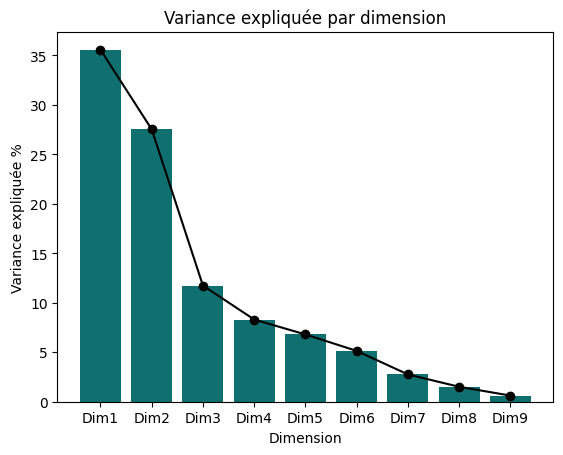

In [15]:
#Visualiser la variance expliquée pour chaque dimension à l'aide du diagramme éboulis des valeurs propres

sns.barplot(composantes, x="Dimension", y="Variance expliquée %", color="teal")
plt.plot(composantes["Dimension"], composantes["Variance expliquée %"],c="black", marker="o")
plt.title("Variance expliquée par dimension")
plt.show()

Selon la méthode du coude, les 3 premières composantes sont sélectionnées et expliquent plus de 70% de la variance\
de notre jeu de données


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.4 - Composantes Principales</h3>
</div>

In [16]:
#Application de l'ACP sur les 3 composantes principales

n_components = 3

pca= PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca[:10]

array([[ 2.51524224,  1.3195751 ,  2.75991528],
       [-0.55035557, -2.02483519, -0.52331925],
       [ 1.6194583 ,  1.1496346 ,  1.37067712],
       [-0.44622057, -1.48980648, -0.67208638],
       [ 2.03008662,  0.39998724,  0.80085761],
       [ 2.19300678, -2.10387047,  0.01672963],
       [-0.56388599,  2.24549921, -1.95948884],
       [ 2.55851085, -1.80802006,  0.61850703],
       [-0.19222897,  0.58683125, -1.46195232],
       [ 0.20324611, -1.54131148, -0.63055005]])

In [17]:
#Récupérer les coordonnées des 3 premières composantes principales  
pcs =pca.components_
pcs

array([[ 0.29994447,  0.46688428,  0.46039556,  0.25930713, -0.31584916,
        -0.19456582, -0.21512585,  0.18877054,  0.43967957],
       [-0.150746  ,  0.30732399,  0.30329312,  0.51686483,  0.34062838,
         0.12477035,  0.36763329, -0.48112434, -0.15956642],
       [ 0.48624571, -0.00969499, -0.11587168, -0.11868379,  0.1739263 ,
        -0.68662836,  0.47911891, -0.02703074, -0.06296488]])

In [18]:
#Nommer les composantes principales 

pcs = pd.DataFrame(pcs)

pcs.columns = colonnes
pcs.index = [f"PC{i+1}" for i in pcs.index]


pcs

Importations (kg)  Nourriture (kg)  Production (kg)  Population  \
PC1           0.299944         0.466884         0.460396    0.259307   
PC2          -0.150746         0.307324         0.303293    0.516865   
PC3           0.486246        -0.009695        -0.115872   -0.118684   

     Croissance_Pop (%)   PIB (%)  Couts_export (USD)  \
PC1           -0.315849 -0.194566           -0.215126   
PC2            0.340628  0.124770            0.367633   
PC3            0.173926 -0.686628            0.479119   

     Stabilite_politique (%)  Infra_logistique (idx)  
PC1                 0.188771                0.439680  
PC2                -0.481124               -0.159566  
PC3                -0.027031               -0.062965

In [19]:
#Transposer notre dataframe des composantes

pcs.T

PC1       PC2       PC3
Importations (kg)        0.299944 -0.150746  0.486246
Nourriture (kg)          0.466884  0.307324 -0.009695
Production (kg)          0.460396  0.303293 -0.115872
Population               0.259307  0.516865 -0.118684
Croissance_Pop (%)      -0.315849  0.340628  0.173926
PIB (%)                 -0.194566  0.124770 -0.686628
Couts_export (USD)      -0.215126  0.367633  0.479119
Stabilite_politique (%)  0.188771 -0.481124 -0.027031
Infra_logistique (idx)   0.439680 -0.159566 -0.062965

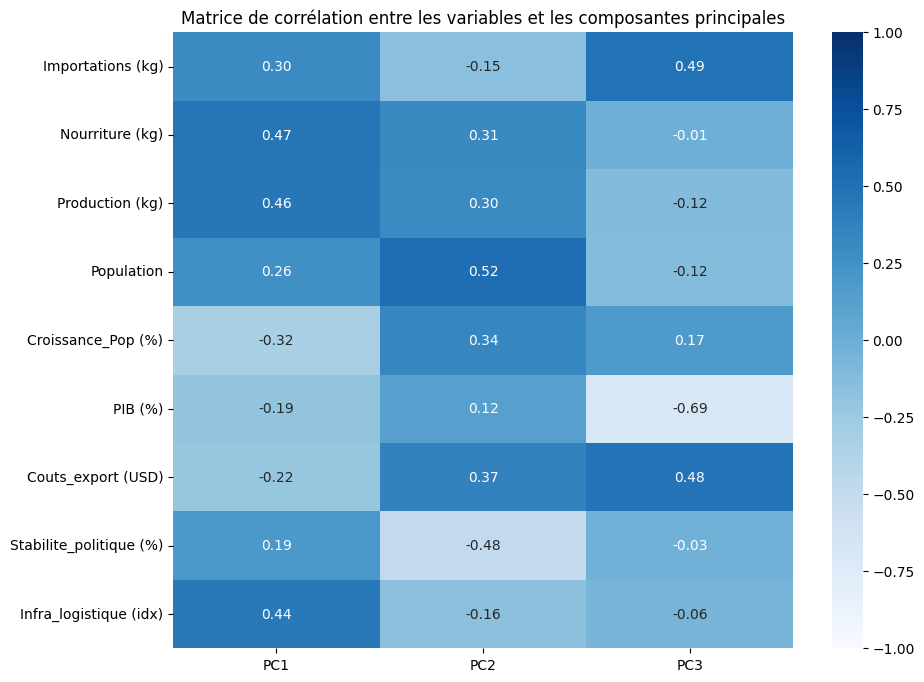

In [20]:
#Visualiser la contribution des variables sur chaque composante avec une heatmap 

plt.subplots(figsize=(10, 8))

sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="Blues", fmt="0.2f")
plt.title("Matrice de corrélation entre les variables et les composantes principales")

plt.show()

Principales contributions des variables sur chaque composantes 

PC1 : Nourriture, Production, infra_logistique\
PC2 : Population, stabilite_politique (anticorrélées)\
PC3 : PIB (anticorrélées), Importation, couts_exportation

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.5 - Introduction d'une variable illustrative </h3>
</div>

In [21]:
#Chargement de la variable supplémentaire 
distances= pd.read_excel("distances.xls")

#récupérer la variables numérique
dist= distances["Distance (km)"].values

In [22]:
#Standardiser les données 

dist_scaled = scaler.fit_transform(dist.reshape(dist.shape[0],1))

In [23]:
#Corrélation de la variable illustrative avec les composantes principales
dim=X_pca.shape[1]

dist_coord = np.zeros((dist_scaled.shape[1],dim))
for j in range(dim):
    for k in range(dist_scaled.shape[1]):
        dist_coord[k,j] = np.corrcoef(dist_scaled[:,k],X_pca[:,j])[0,1]

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.6 - Cercle de corrélation </h3>
</div>

In [24]:
# Cercle de corrélation
def correlation_graph(pca, 
                      x_y, 
                      colonnes,
                      supp_coord=None,
                      label_supp=None) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y
    
    #Vérification des dimensions de la PCA
    if max(x_y) >= pca.n_components_:
        raise ValueError(f"Plan F{x+1} et F{y+1} sont invalides : PCA n'a que {pca.n_components_} composantes.")

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(15, 12))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.03,
                pca.components_[y, i] + 0.03,
                colonnes[i])
    
    #Variable illustrative
    if supp_coord is not None and label_supp is not None : 
        if len(supp_coord) < max(x_y)+1:
            raise ValueError(f"Les coordonnées supp_coord ne correspondent pas au plan demandé :{x_y}.")
        ax.arrow(0,0, 
                 supp_coord[x],
                 supp_coord[y],
                 color="red",
                 alpha=0.5,
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02)
        
        
       #Le label
        plt.text(supp_coord[x] + 0.03,supp_coord[y] + 0.03, label_supp, color="red")
        
    
    
                
        
    
     # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du cercle de corrélations
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

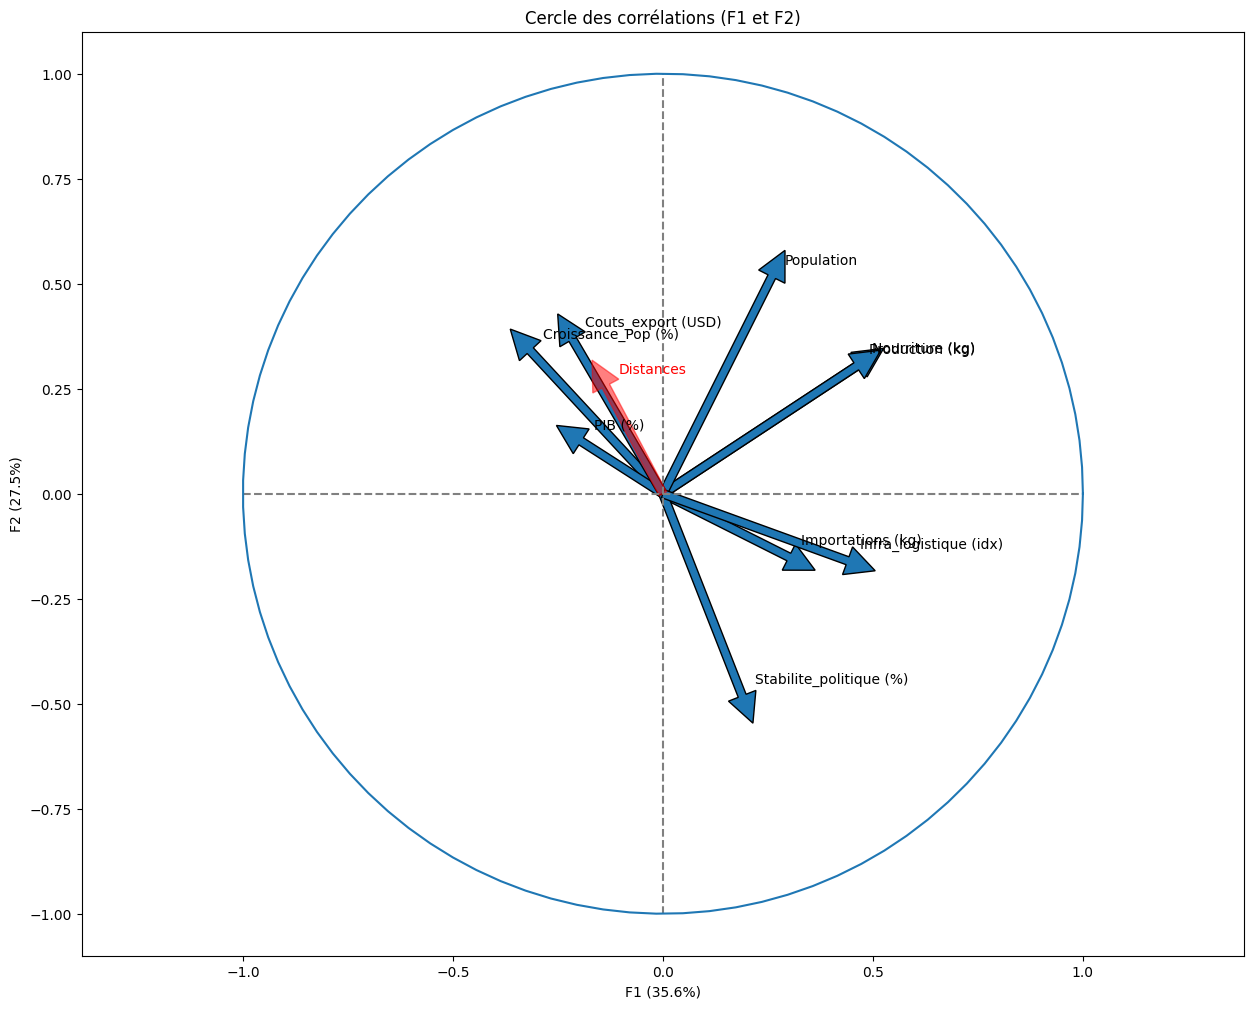

In [25]:
#Projection des variables sur composantes 1 et 2
x_y=(0,1)
x_y
correlation_graph(pca,x_y,colonnes,supp_coord=dist_coord[k], label_supp="Distances")

Contribution à F1 : Importations et Infra_logistique
Contribution à F2 : Population, couts_exportations et Stabilite politique (anticorrélée)
Pays cibles se situe dans la partie droite en bas (Importation, Infra_logistique et Stabilite politique)

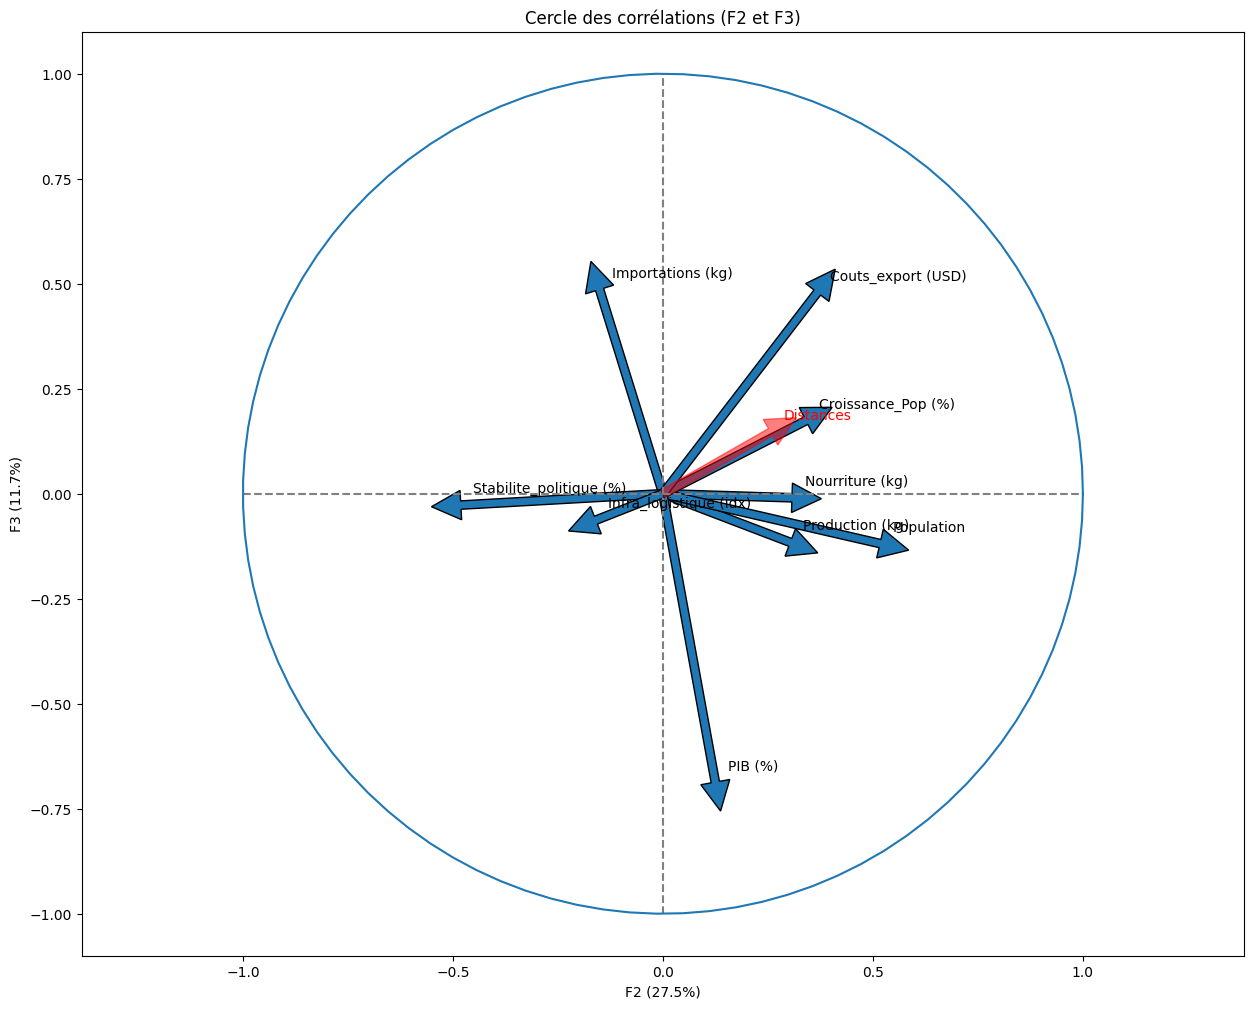

In [26]:
#Projection des variables sur composantes 2 et 3
x_y = (1,2)

correlation_graph(pca,x_y,colonnes, supp_coord=dist_coord[k], label_supp="Distances")

Contribution à F2 : Population, Stabilite politique (anticorrélée)
Contribution à F3 : Importations, couts_exportations et PIB (anticorrélées)
Pays cibles se situe dans la moitié basse du cercle (Stabilite politique, Population et PIB% )

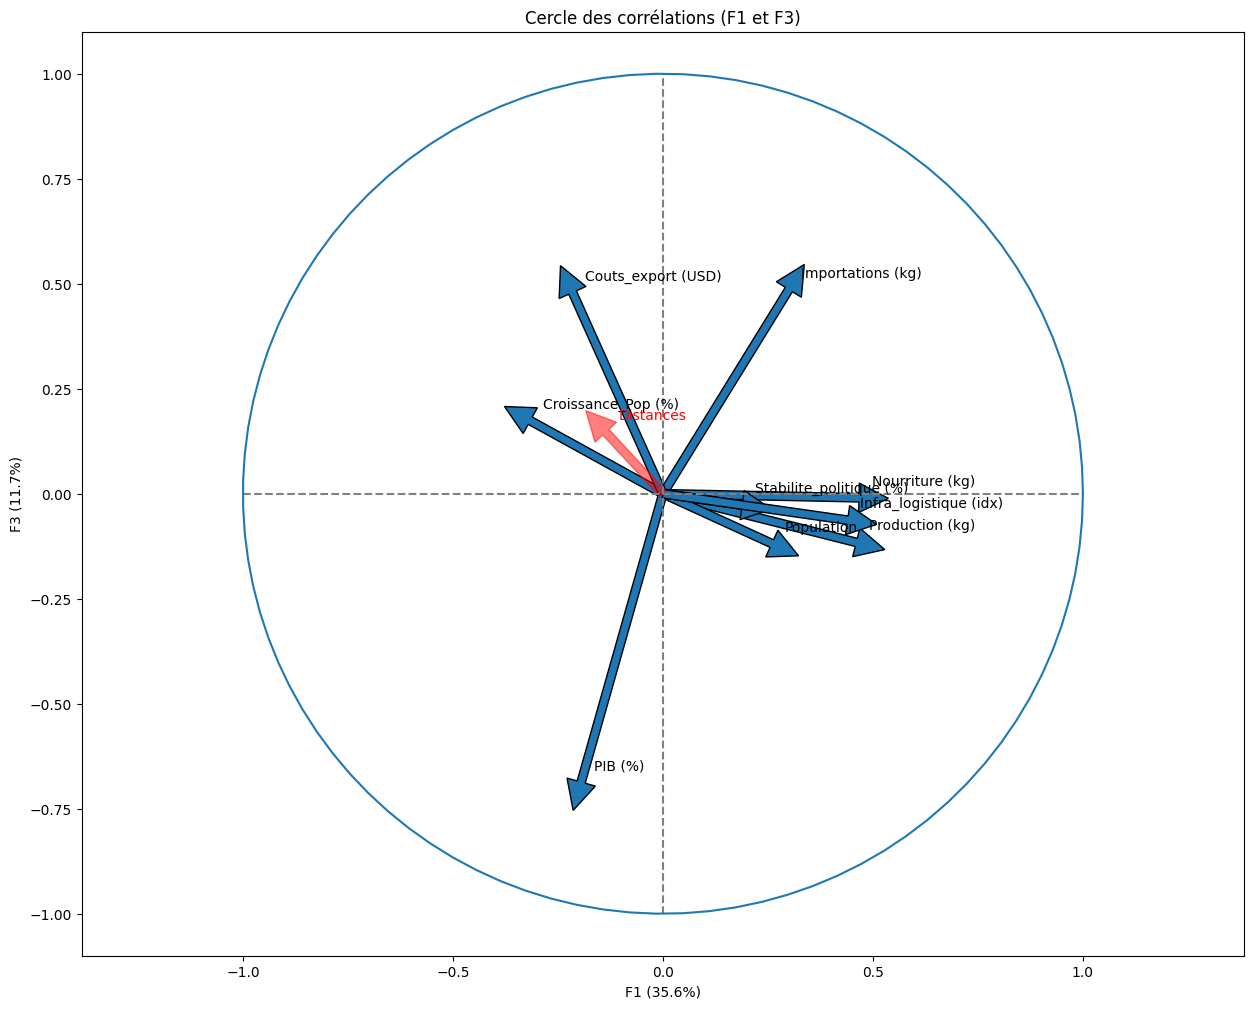

In [27]:
#Projection des variables sur composantes 1 et 3
x_y = (0,2)
x_y
correlation_graph(pca,x_y,colonnes, supp_coord=dist_coord[k], label_supp="Distances")

Contribution à F1 : Infra_logistique, Production et Nourriture\
Contribution à F3 : Couts_exportations, Importations et PIB (anticorrélée)\
Pays cibles se situe dans la partie en bas à droite du cercle (Importations, Infra logistique)

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">6.7 - Projection des indivividus </h3>
</div>

In [28]:
#Projection des individus 

#Def de la projection des individus
def display_factorial_planes(   X_proj, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None,
                                supp_var=None,
                                label_supp_var=None,
                                alpha=1,
                                figsize=(15,12),
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_pca en np.array
    X_ = np.array(X_proj)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=(25,20))

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    #    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)
    
    

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)
    

    # Affichage des labels des points
    if labels is not None : 
        # une boucle for pour afficher les labels pour chaque point
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 
    
    #Affichage de la variable supplémentaire
    if supp_var is not None:
        if len(supp_var) <= max(x_y):
            raise ValueError("Les coordonnées de la variable supplémentaire ne correspondent pas au plan demandé.")
        
        #Ajout de la variable supplémentaire
        ax.scatter(supp_var[x], supp_var[y], color="red", label=label_supp_var,s=100, marker="X", edgecolor="black")
        plt.text(supp_var[x] +0.05, supp_var[y] +0.05, label_supp_var, color="red", fontsize=14)                          
                                   

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et C{y+1})")
    
    
    #Affichage de la légende
    if supp_var is not None:
        ax.legend()
    
    plt.show()
 



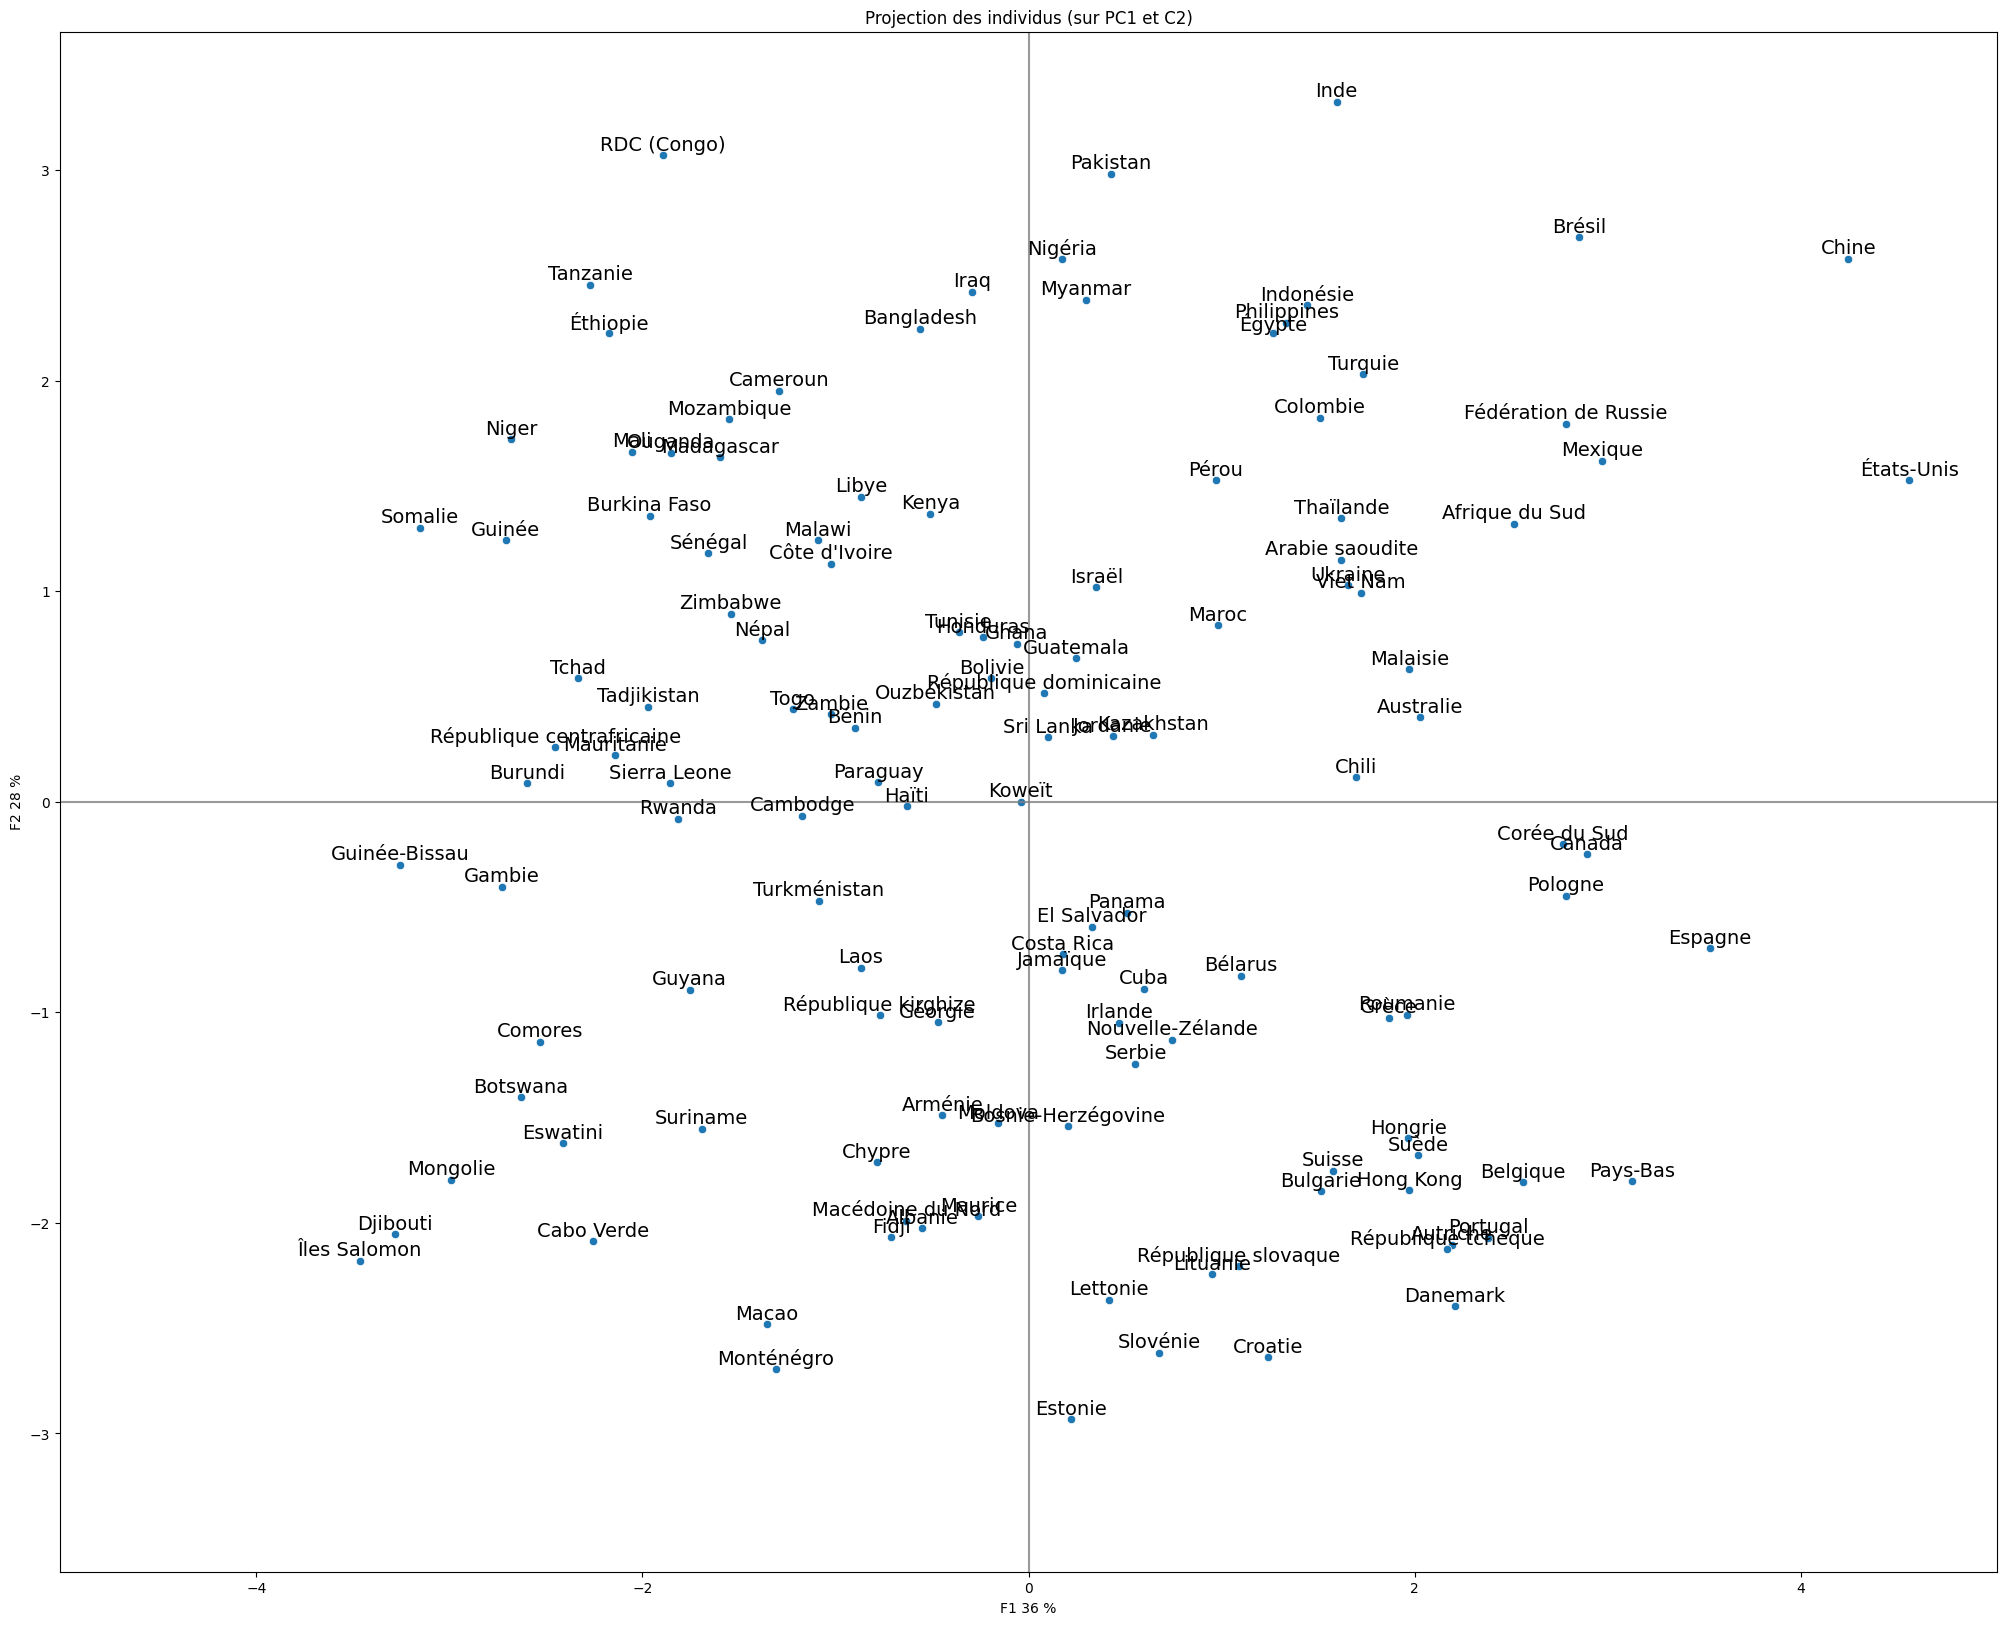

In [29]:
#Projection des individus sur PC1 et PC2

X_proj = X_pca
display_factorial_planes(X_proj,(0,1),pca, labels=pays, marker="o")

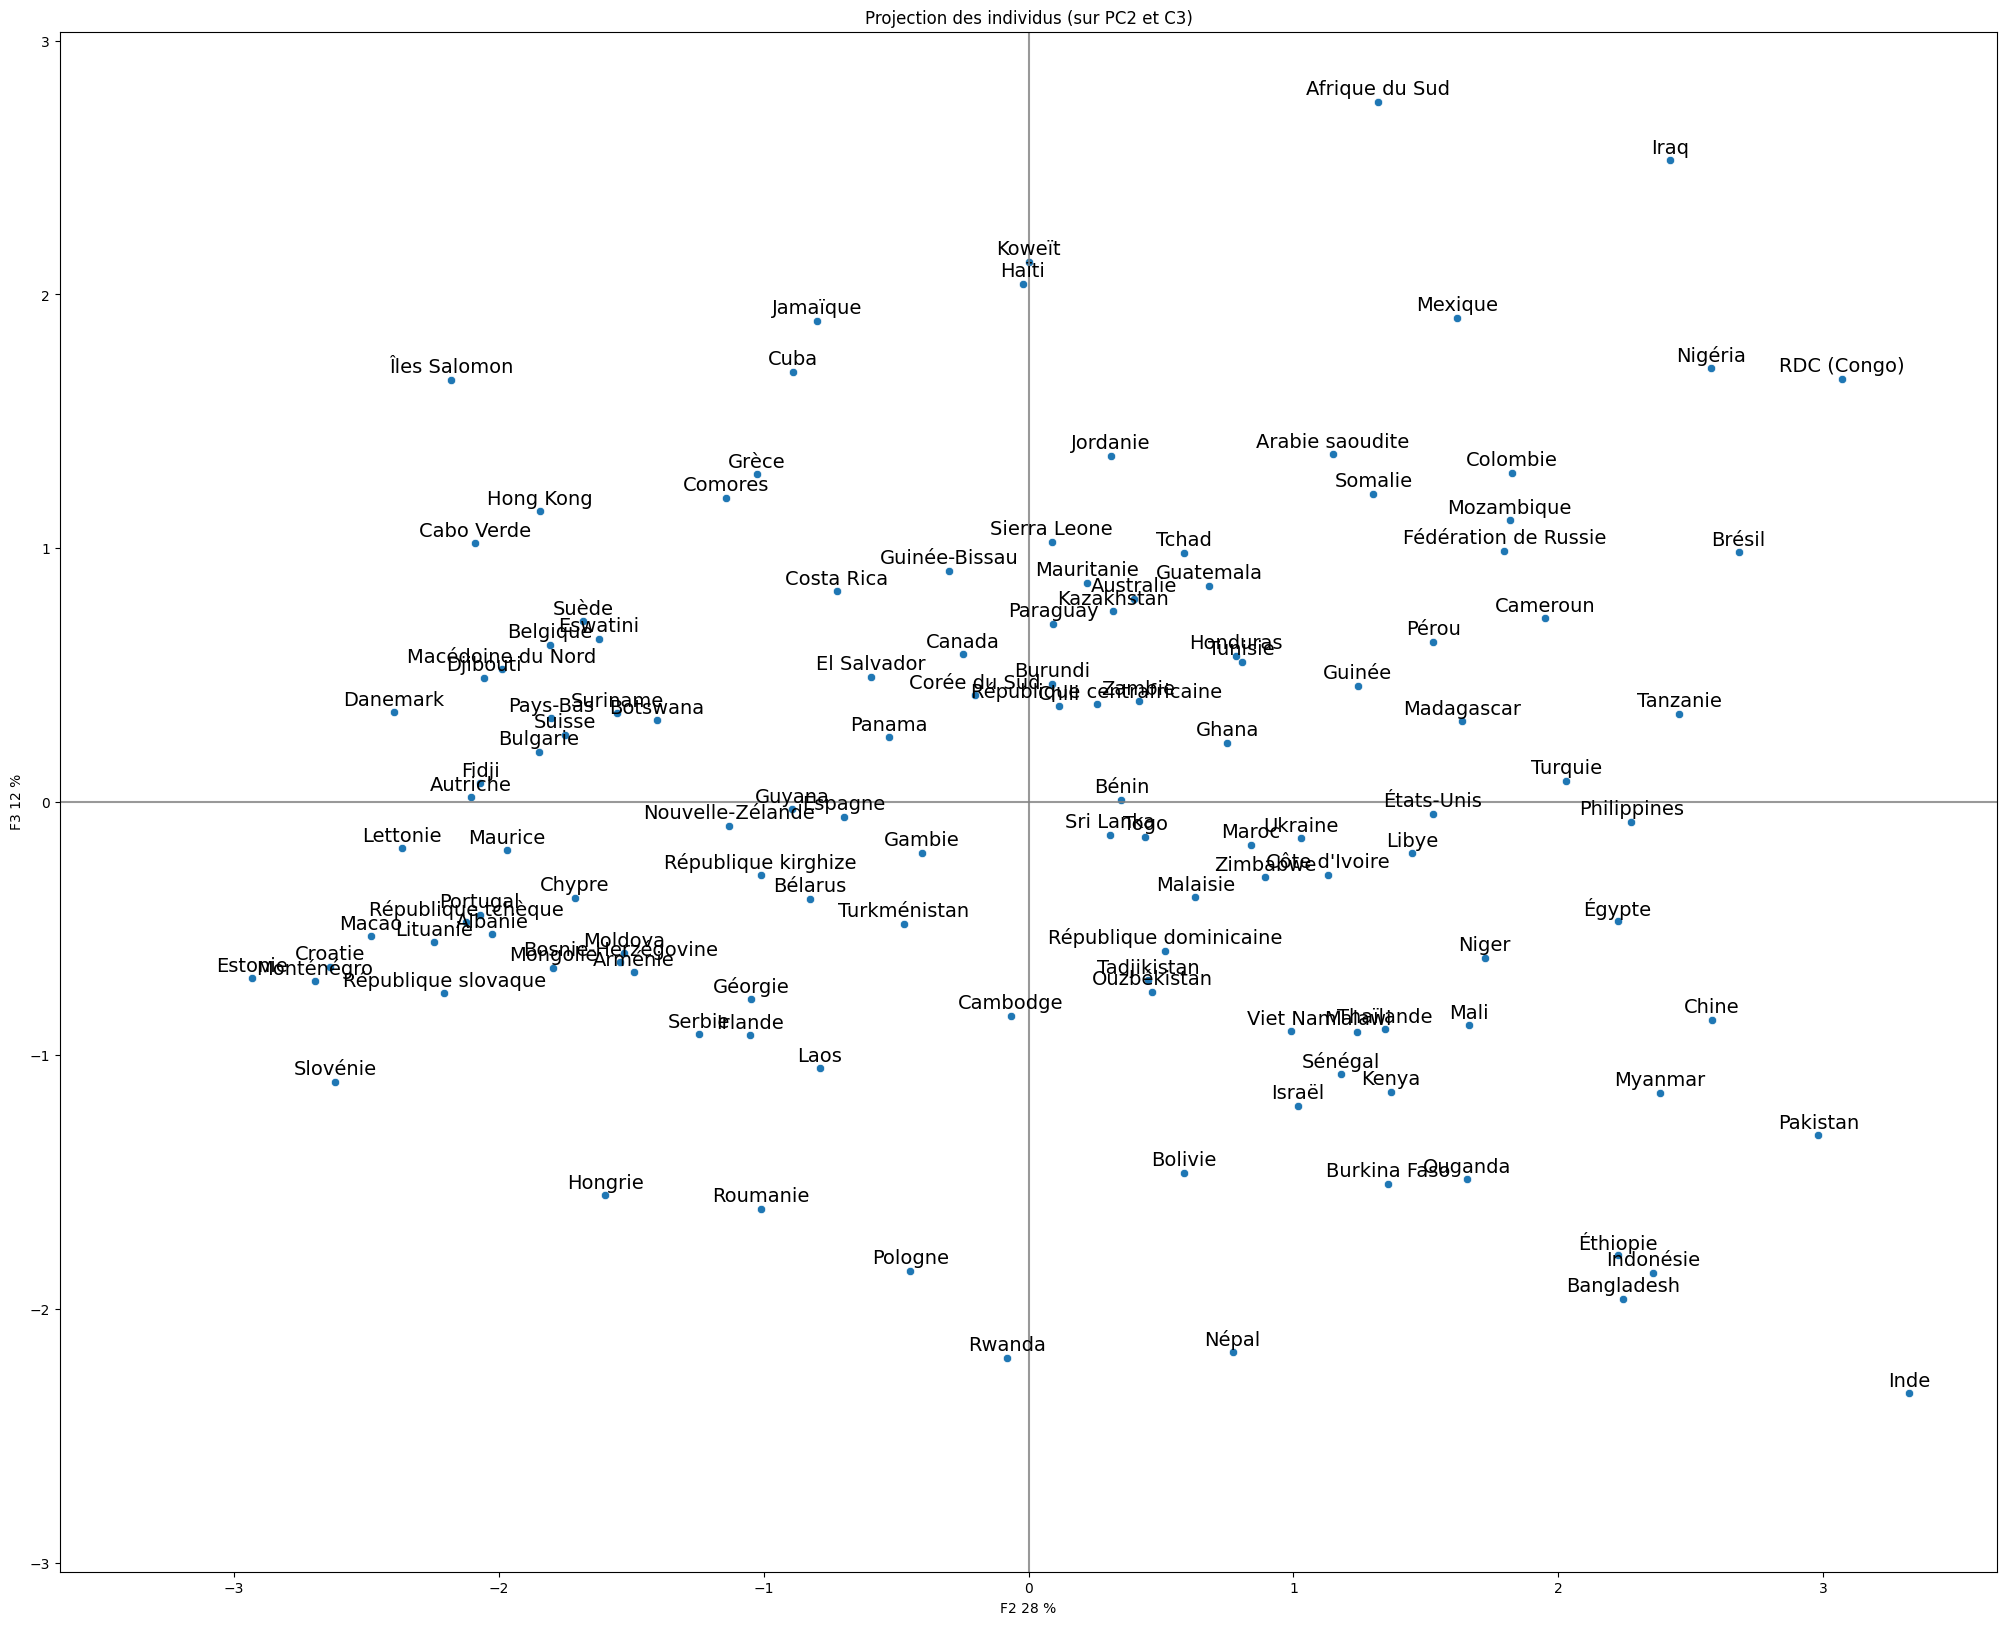

In [30]:
#Projection des pays sur PC2 et PC3
display_factorial_planes(X_proj,(1,2), pca, labels=pays, marker="o")

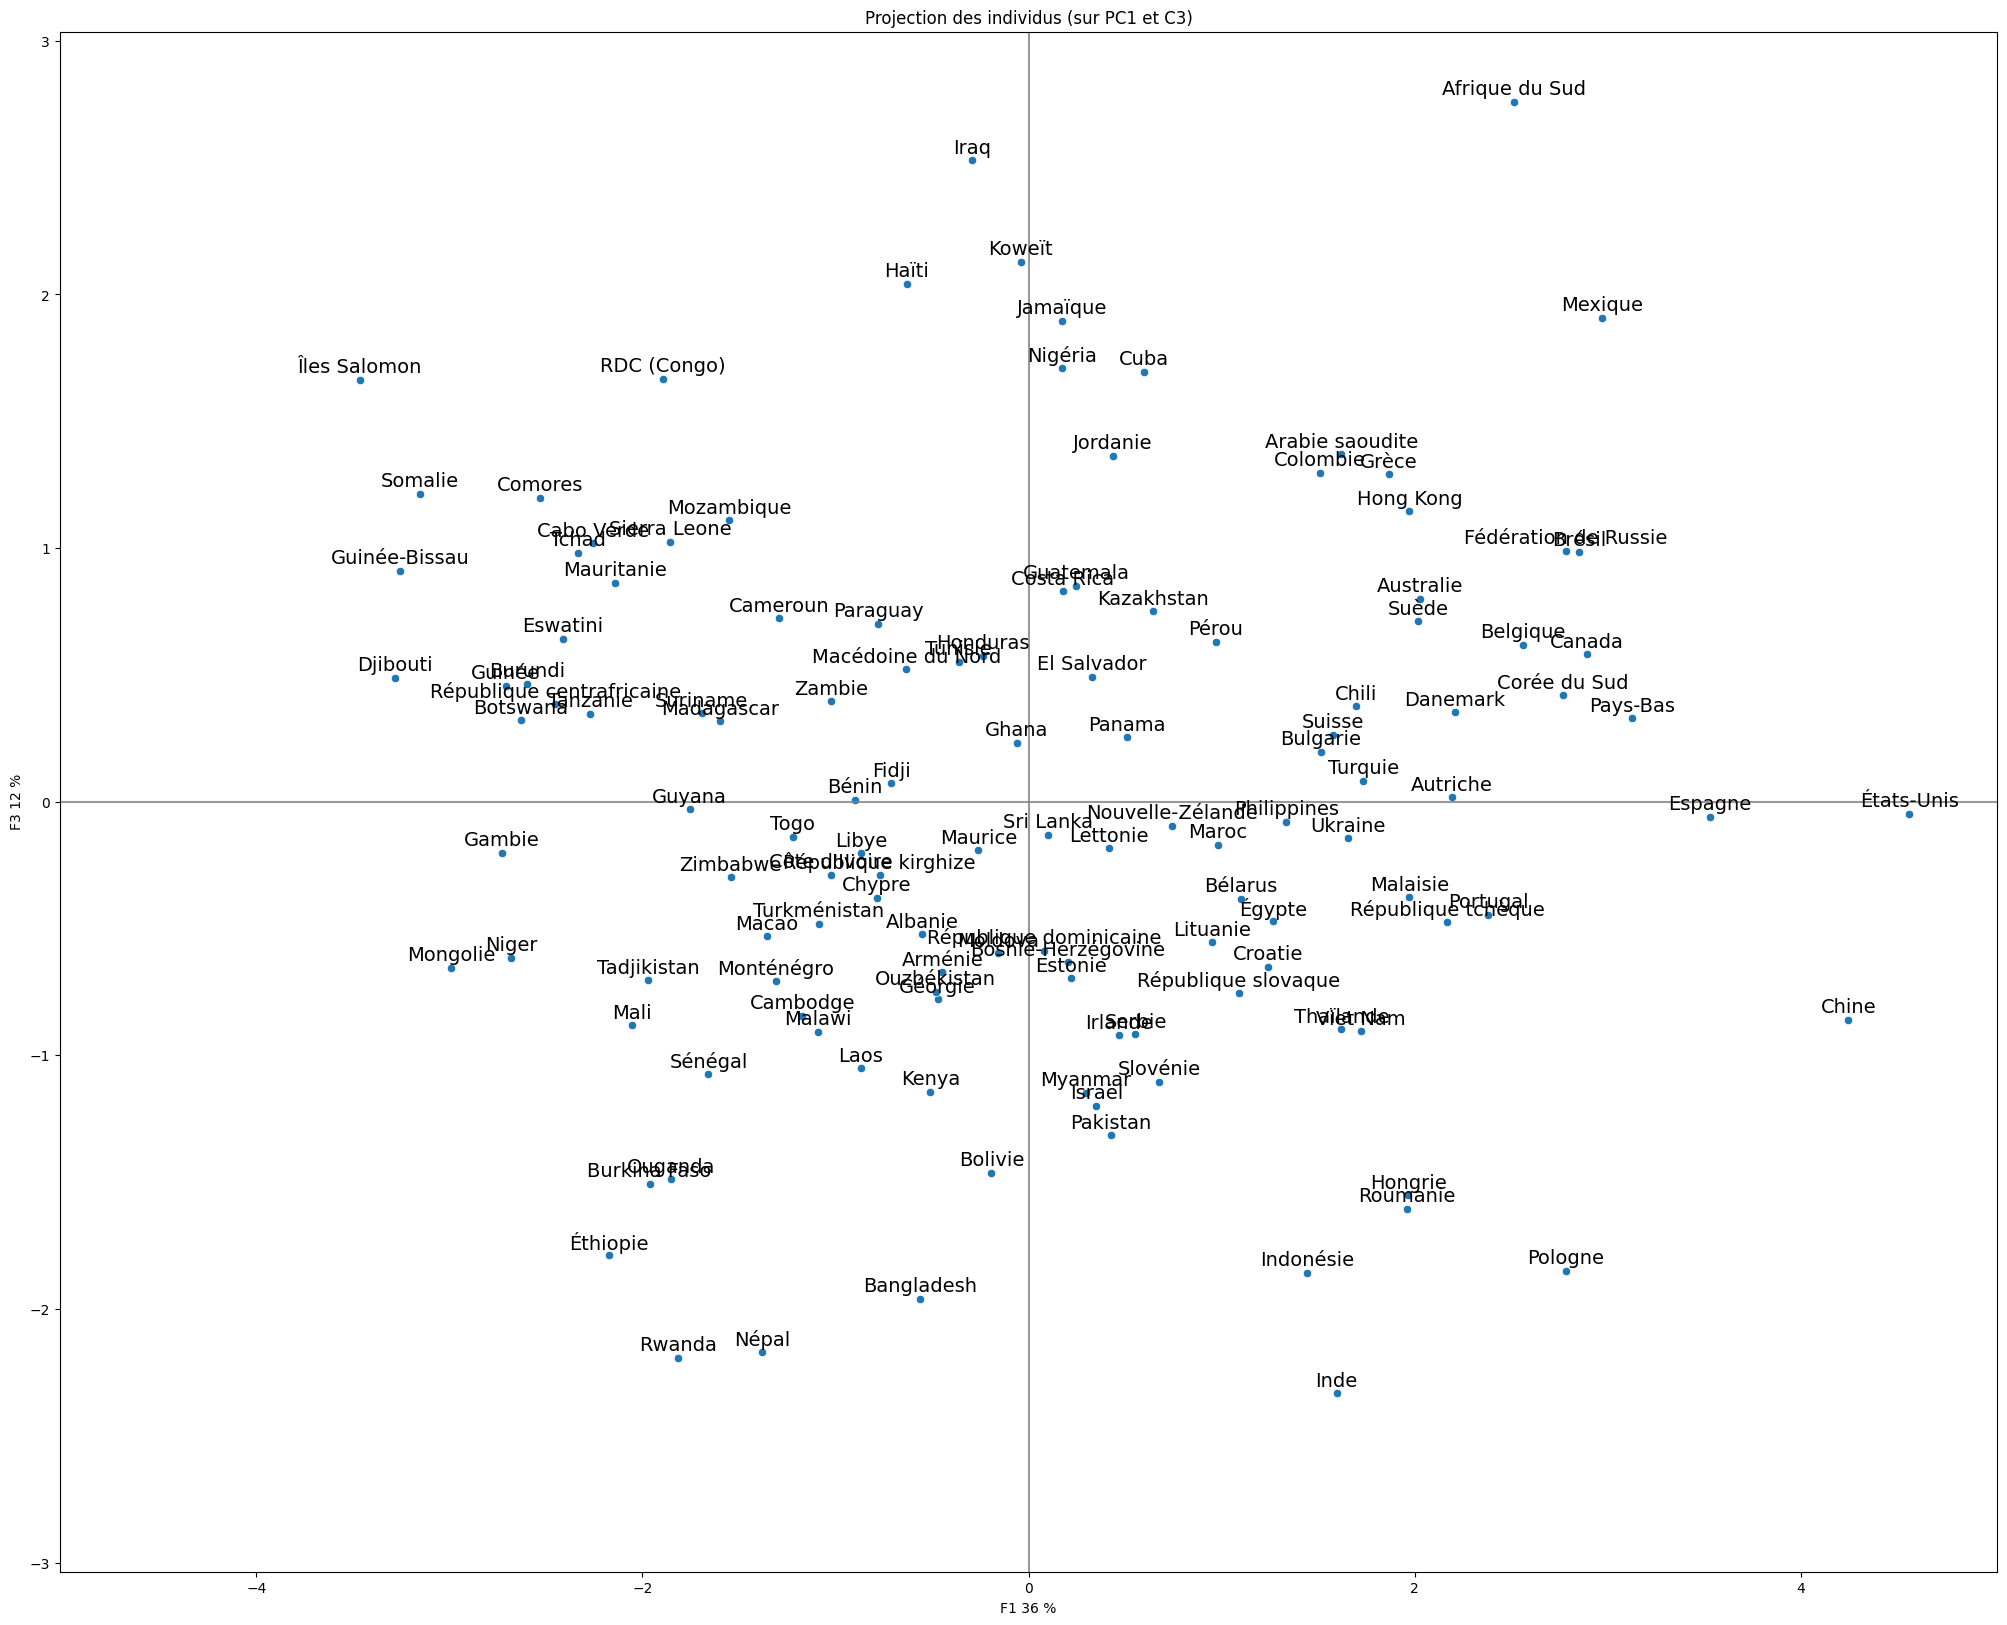

In [31]:
#Projection des pays sur PC1 et PC3
display_factorial_planes(X_proj,(0,2), pca, labels=pays, marker="o")

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Classification Hiérarchique Ascendante (CAH) </h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">7.1 - Récupération des données</h3>
</div>

In [32]:
#Copie de nos données standardisées et normalisées pour réaliser la classification hiérarchique
etude_cah = X_scaled.copy()

etude_cah


array([[ 1.70718439e+00,  1.46496215e+00,  1.28663581e+00, ...,
         2.04248808e+00, -1.40805892e-03,  9.38401868e-01],
       [-1.25502841e-01, -9.52200270e-01, -7.33455013e-01, ...,
        -9.97968704e-01,  7.24458279e-01, -4.66236986e-01],
       [ 1.85621263e+00,  1.17652828e+00,  6.73064780e-01, ...,
         3.60828917e-01, -6.47657933e-01,  8.36724852e-01],
       ...,
       [ 8.83315109e-01,  2.40064901e+00,  2.99279183e+00, ...,
        -2.91767433e-01,  7.39983694e-01,  1.84131235e+00],
       [-1.95340176e+00, -3.59291253e-01, -2.02050031e-01, ...,
        -3.07178144e-01, -1.30934371e+00, -1.97636810e+00],
       [-4.03670865e-01, -2.10765660e+00, -2.91398942e+00, ...,
         1.00244562e+00,  7.08883780e-01, -6.26128947e-01]])

In [33]:
#Convertir l'array en dataframe

etude_cah = pd.DataFrame(etude_cah, columns=colonnes)

etude_cah

Importations (kg)  Nourriture (kg)  Production (kg)  Population  \
0             1.707184         1.464962         1.286636    0.979266   
1            -0.125503        -0.952200        -0.733455   -0.948066   
2             1.856213         1.176528         0.673065    0.685465   
3             0.254546        -0.629187        -0.822291   -0.958054   
4            -0.024263         1.188802         1.088537    0.479004   
..                 ...              ...              ...         ...   
122          -0.467935        -0.394737        -0.268833    0.161318   
123           0.394936         1.355109         1.177281    1.320953   
124           0.883315         2.400649         2.992792    1.956509   
125          -1.953402        -0.359291        -0.202050    1.359804   
126          -0.403671        -2.107657        -2.913989   -2.035179   

     Croissance_Pop (%)   PIB (%)  Couts_export (USD)  \
0             -0.368384 -1.971722            2.042488   
1             -1.166107 -0.003140           -0.997969   
2              0.778463 -0.532680            0.360829   
3             -1.557731  0.631484           -0.674213   
4              0.237267 -0.743443            1.267337   
..                  ...       ...                 ...   
122            0.624495  0.537390            0.122273   
123            0.577367  0.694320            0.030850   
124           -0.450715 -0.698662           -0.291767   
125            1.171889  1.339137           -0.307178   
126            0.952425 -0.866082            1.002446   

     Stabilite_politique (%)  Infra_logistique (idx)  
0                  -0.001408                0.938402  
1                   0.724458               -0.466237  
2                  -0.647658                0.836725  
3                  -0.349226               -0.113862  
4                   1.493076                1.769572  
..                       ...                     ...  
122                -0.785310               -1.499105  
123                -1.250996                0.435231  
124                 0.739984                1.841312  
125                -1.309344               -1.976368  
126                 0.708884               -0.626129  

[127 rows x 9 columns]

In [34]:
#Introduction d'une nouvelle variable "Distances" pour obtenir des clusters le plus homogène possible
#Importation du fichier contenant la variale supplémentaire

distances= pd.read_excel("distances.xls")
distances.head()

Code             Pays                          Region  Distance (km)
0  ZAF   Afrique du Sud                Afrique australe           8684
1  ALB          Albanie    Europe centrale et orientale           1601
2  SAU  Arabie saoudite                    Moyen-Orient           4682
3  ARM         ArmÃ©nie    Europe centrale et orientale           3431
4  AUS        Australie  Australie et Nouvelle-ZÃ©lande          16926

In [35]:
#récupérer uniquement la variable numérique

dist= distances.values[:,3]

#Introduction de la variable supplémentaire dans le dataframe initiale
etude_marche["Distance (km)"]= dist

In [36]:
#Normaliser les données de la nouvelle variable Distance

dist_scaled = scaler.fit_transform(dist.reshape(-1,1))

In [37]:
#ajout de la nouvelle variable standardisée au dataframe contenant les données standardisées

etude_cah["Distances"]= dist_scaled

In [38]:
#Calcul des distances entre les individus (Pays)

Z = linkage(etude_cah, method="ward")

pd.DataFrame(Z)


0      1          2      3
0      5.0   33.0   0.579280    2.0
1     91.0  101.0   0.628599    2.0
2      3.0   48.0   0.743450    2.0
3      9.0   74.0   0.896664    2.0
4     37.0  104.0   0.946179    2.0
..     ...    ...        ...    ...
121  235.0  241.0   9.487856   31.0
122  243.0  245.0  11.454399   48.0
123  246.0  249.0  14.477112   67.0
124  247.0  248.0  19.337712   60.0
125  250.0  251.0  22.147561  127.0

[126 rows x 4 columns]

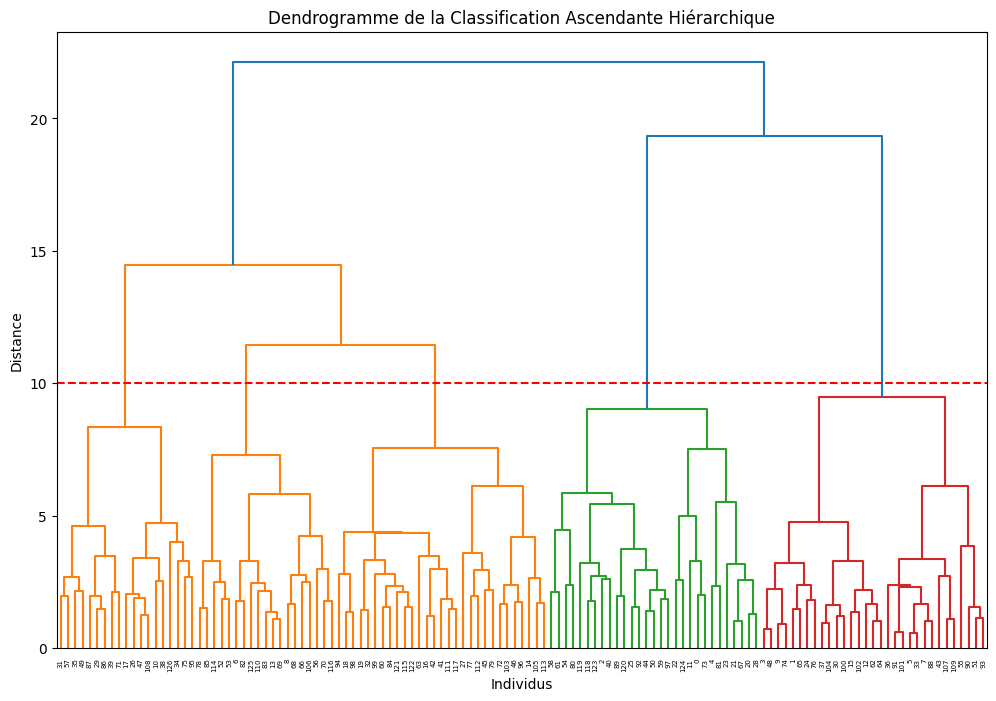

In [39]:
#Afficher le dendrograme
plt.figure(figsize=(12,8))
dendrogram(Z)
plt.axhline(y=10, color="r", ls="--")
plt.title("Dendrogramme de la Classification Ascendante Hiérarchique")
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.show()

Selon le niveau de profondeur on constate 3 clusters de tailles différentes. \
Pour avoir des clusters plus homogènes je choisis 5 clusters

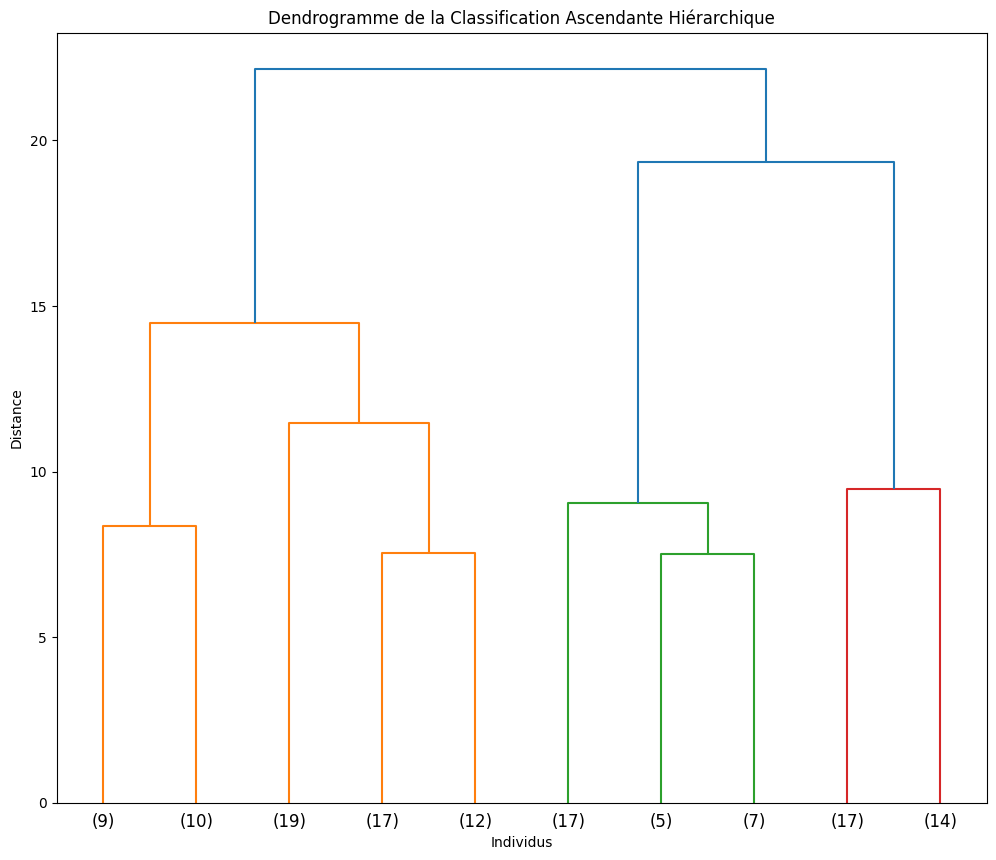

In [40]:
#Dendogramme à 10 clusters
plt.figure(figsize=(12,10))
dendrogram(Z, p=10, truncate_mode="lastp")
plt.title("Dendrogramme de la Classification Ascendante Hiérarchique")
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.show()


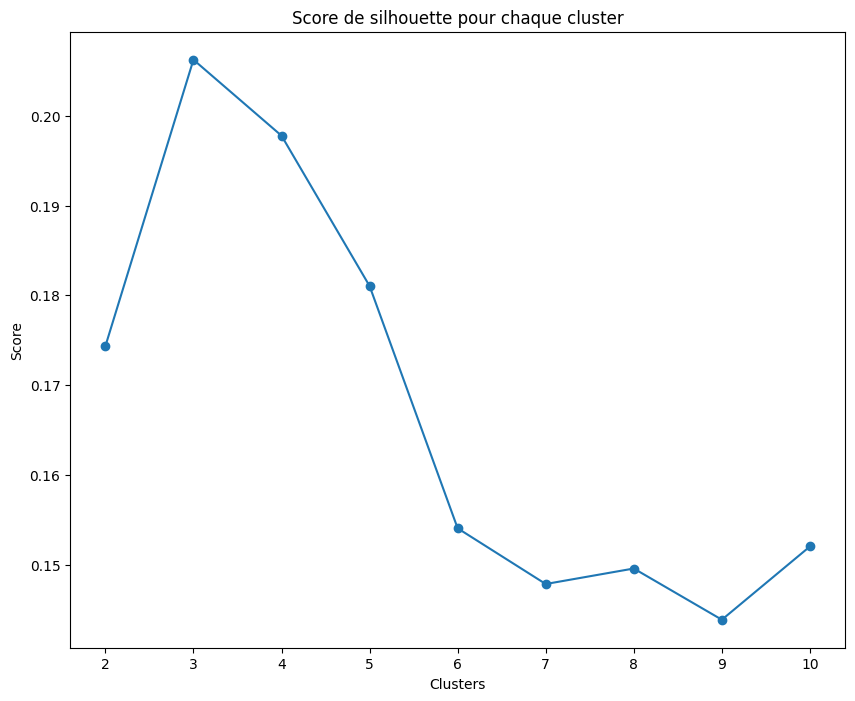

In [41]:
#Calculer le silhouette score pour 10 clusters max de notre jeu de données

range_clusters = range(2,11)

silhouette_scores = []
for n_clust in range_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clust)
    cluster_labels = agglom.fit_predict(etude_cah)
    
    #Calcule du silhouette score
    score = silhouette_score(etude_cah, cluster_labels)
    silhouette_scores.append(score)
    
    


#Visualiser le silhouette score pour chaque cluster


plt.figure(figsize=(10,8))
plt.plot(range_clusters, silhouette_scores, marker="o")
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Score de silhouette pour chaque cluster")
plt.show()

Selon le score de silhouette, le nombre de cluster optimal est 2 pour notre jeu de données car silhouette score est le plus élevé. On peut également choisir 3 4 ou 5 cluster qui sont très proche de 0.50. Je choisi 5 clusters pour avoir des groupes plus homogènes



In [42]:
#Appliquer la CAH sur le nombre de clusters choisi

cah= AgglomerativeClustering(n_clusters=5, linkage="ward")

cah.fit(etude_cah)

#Socker les clusters dans une variable
CAH_clusters = cah.labels_+1

#Copie du dataframe initial pour intégrer les clusters du CAH

cah_etude = etude_marche.copy()

#Intégrer les clusters dans le dataframe du kmeans
cah_etude["CAH_clusters"] = CAH_clusters

cah_etude

Code             Pays                         Region  Importations (kg)  \
0    ZAF   Afrique du Sud               Afrique australe        515000000.0   
1    ALB          Albanie   Europe centrale et orientale         12000000.0   
2    SAU  Arabie saoudite                   Moyen-Orient        641000000.0   
3    ARM          Arménie   Europe centrale et orientale         33000000.0   
4    AUS        Australie  Australie et Nouvelle-Zélande         16000000.0   
..   ...              ...                            ...                ...   
122  ZWE         Zimbabwe               Afrique australe          4000000.0   
123  EGY           Égypte                   Moyen-Orient         46000000.0   
124  USA       États-Unis               Amérique du Nord        128000000.0   
125  ETH         Éthiopie               Afrique de l'Est                0.0   
126  SLB     Îles Salomon              Iles du Pacifique          5000000.0   

     Nourriture (kg)  Production (kg)   Population  Croissance_Pop (%)  \
0       2.156000e+09     1.762000e+09   57339635.0                2.62   
1       2.700000e+07     1.600000e+07    2877013.0               -0.19   
2       1.181000e+09     5.540000e+08   35018133.0                6.93   
3       4.500000e+07     1.200000e+07    2836557.0               -1.46   
4       1.211000e+09     1.235000e+09   24979230.0                4.87   
..               ...              ...          ...                 ...   
122     6.600000e+07     6.200000e+07   15052184.0                6.34   
123     1.709000e+09     1.451000e+09  103740765.0                6.16   
124     1.861800e+10     2.229800e+10  332140037.0                2.32   
125     7.000000e+07     7.400000e+07  111129438.0                8.45   
126     5.000000e+06     0.000000e+00     659249.0                7.60   

     PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0       1.56             1257.00                    38.21   
1       4.02               54.67                    58.49   
2       3.20              363.00                    23.11   
3       5.20              100.00                    29.72   
4       2.91              766.00                    83.49   
..       ...                 ...                      ...   
122     5.01              285.00                    20.28   
123     5.33              258.00                    11.79   
124     2.97              175.00                    58.96   
125     6.82              171.50                    10.85   
126     2.75              630.00                    58.02   

     Infra_logistique (idx) Distance (km)  CAH_clusters  
0                  3.190000          8684             3  
1                  2.290000          1601             1  
2                  3.110000          4682             3  
3                  2.480000          3431             1  
4                  3.970000         16926             3  
..                      ...           ...           ...  
122                1.830000          7940             4  
123                2.820000          3209             3  
124                4.050000          6166             3  
125                1.655714          5573             5  
126                2.210000         15431             2  

[127 rows x 14 columns]

In [43]:
# Afficher le nombre de pays ainsi que les pays par cluster
for clust, pays_count in cah_etude.groupby("CAH_clusters"):
    nbr_pays = pays_count["Pays"].nunique()
    pays = pays_count["Pays"].tolist()
    print(f"Pour le cluster {clust} :")
    print(f"il y a {nbr_pays} pays ")
    print(f"Les pays sont {pays} \n")

Pour le cluster 1 :
il y a 31 pays 
Les pays sont ['Albanie', 'Arménie', 'Autriche', 'Belgique', 'Bosnie-Herzégovine', 'Bulgarie', 'Bélarus', 'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Grèce', 'Géorgie', 'Hongrie', 'Irlande', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Moldova', 'Monténégro', 'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie', 'République slovaque', 'République tchèque', 'Serbie', 'Slovénie', 'Suisse', 'Suède'] 

Pour le cluster 2 :
il y a 19 pays 
Les pays sont ['Botswana', 'Cabo Verde', 'Comores', 'Costa Rica', 'Cuba', 'Djibouti', 'El Salvador', 'Eswatini', 'Fidji', 'Guyana', 'Haïti', 'Jamaïque', 'Maurice', 'Mongolie', 'Panama', 'Paraguay', 'Macao', 'Suriname', 'Îles Salomon'] 

Pour le cluster 3 :
il y a 29 pays 
Les pays sont ['Afrique du Sud', 'Arabie saoudite', 'Australie', 'Brésil', 'Canada', 'Chili', 'Chine', 'Hong Kong', 'Colombie', 'Corée du Sud', 'Fédération de Russie', 'Guatemala', 'Honduras', 'Iraq', 'Jordanie', 'Kazakhstan', 'Koweït', 'Malaisie'

In [44]:
#Visualisation sur une mappemonde des clusters
fig = px.choropleth(
    cah_etude,
    color_continuous_scale = px.colors.diverging.Spectral,
    locations="Code",
    color="CAH_clusters",
    hover_name="Region",
    projection="equirectangular")

fig.update_layout()

fig.show()

Cluster 1 : Pays d'Europe majoritairement pays assez reparti, pays d'Amérique du Nord, d'Amérique Latine, d'Asie, Australie et Nouvelle Zélande\
Cluster 2 : Pays d'Amérique Latine, d'Afrique et d'Asie\
Cluster 3 : Pays assez répartis dans le monde (Amérique du Nord, Amérique Latine, Afrique, Moyen Orient, Asie, Russie, Australie\
Cluster 4 : Pays d'Afrique et d'Asie\
Cluster 5 : Pays d'Amérique Latine, Afrique et Asie\

In [91]:
#Caractérisation des clusters par variables

# Modifier le tyde de données de la colonne Distance (km)
cah_etude["Distance (km)"] =cah_etude["Distance (km)"].astype("int") 

cah_group = cah_etude.iloc[:,3:].groupby("CAH_clusters", as_index=False).mean()

cah_group


CAH_clusters  Importations (kg)  Nourriture (kg)  Production (kg)  \
0             1       8.796774e+07     2.098710e+08     3.041613e+08   
1             2       3.105263e+07     7.526316e+07     4.647368e+07   
2             3       2.169310e+08     2.763517e+09     2.932931e+09   
3             4       2.982759e+07     6.527586e+07     3.700000e+07   
4             5       5.263158e+05     7.005789e+08     8.257368e+08   

     Population  Croissance_Pop (%)   PIB (%)  Couts_export (USD)  \
0  8.873966e+06           -0.110645  3.857097           66.146129   
1  3.219081e+06            3.644211  3.712105          425.111579   
2  1.146267e+08            4.340690  3.592414          459.697931   
3  1.910742e+07            7.751379  5.280690          480.534828   
4  1.323712e+08            5.400526  5.144737          300.593158   

   Stabilite_politique (%)  Infra_logistique (idx)  Distance (km)  
0                62.355484                3.109355    1508.903226  
1                56.554737                2.292506    8811.947368  
2                39.233103                3.009655    7672.137931  
3                25.439310                2.170082    5658.517241  
4                21.425263                2.386617    6486.052632

In [92]:


cols=cah_group.columns
fig=px.parallel_coordinates(data_frame=cah_group, color="CAH_clusters", dimensions = cols,
                            color_continuous_scale=px.colors.diverging.Spectral,
                            labels={"Importations (kg)" :"Importations","Nourriture (kg)":"Nourriture",
                            "Production (kg)":"Production","Croissance_Pop (%)":"Croissance_Pop",
                        "PIB (%)":"PIB","Couts_export (USD)":"Couts_export","Stabilite_politique (%)" :"Stabilite_pol",
                                   "Infra_logistique (idx)":"Infra_logistique","Distance (km)":"Distance"},
                    title=("Performances moyennes de chaque clusters selon les variables"))
fig
fig.show()

Le cluster recommandé est le N°1 près de 90 millions de Kg de poulet importés, couts export les plus faibles, une stabilité politique élevée, infrastructure logistique plus élevé des groupes et distance la plus faible des groupes

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 8 - Étude du kmeans </h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">8.1 - Récupération des données</h3>
</div>

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
#Copie des données standardisées et normalisées pour le Kmeans

etude_kmeans = etude_cah.copy()

#Convertir les données en dataframe
etude_kmeans = pd.DataFrame(etude_kmeans)

etude_kmeans

Importations (kg)  Nourriture (kg)  Production (kg)  Population  \
0             1.707184         1.464962         1.286636    0.979266   
1            -0.125503        -0.952200        -0.733455   -0.948066   
2             1.856213         1.176528         0.673065    0.685465   
3             0.254546        -0.629187        -0.822291   -0.958054   
4            -0.024263         1.188802         1.088537    0.479004   
..                 ...              ...              ...         ...   
122          -0.467935        -0.394737        -0.268833    0.161318   
123           0.394936         1.355109         1.177281    1.320953   
124           0.883315         2.400649         2.992792    1.956509   
125          -1.953402        -0.359291        -0.202050    1.359804   
126          -0.403671        -2.107657        -2.913989   -2.035179   

     Croissance_Pop (%)   PIB (%)  Couts_export (USD)  \
0             -0.368384 -1.971722            2.042488   
1             -1.166107 -0.003140           -0.997969   
2              0.778463 -0.532680            0.360829   
3             -1.557731  0.631484           -0.674213   
4              0.237267 -0.743443            1.267337   
..                  ...       ...                 ...   
122            0.624495  0.537390            0.122273   
123            0.577367  0.694320            0.030850   
124           -0.450715 -0.698662           -0.291767   
125            1.171889  1.339137           -0.307178   
126            0.952425 -0.866082            1.002446   

     Stabilite_politique (%)  Infra_logistique (idx)  Distances  
0                  -0.001408                0.938402   0.816298  
1                   0.724458               -0.466237  -1.121965  
2                  -0.647658                0.836725  -0.278849  
3                  -0.349226               -0.113862  -0.621186  
4                   1.493076                1.769572   3.071723  
..                       ...                     ...        ...  
122                -0.785310               -1.499105   0.612703  
123                -1.250996                0.435231  -0.681936  
124                 0.739984                1.841312   0.127247  
125                -1.309344               -1.976368  -0.035027  
126                 0.708884               -0.626129   2.662616  

[127 rows x 10 columns]

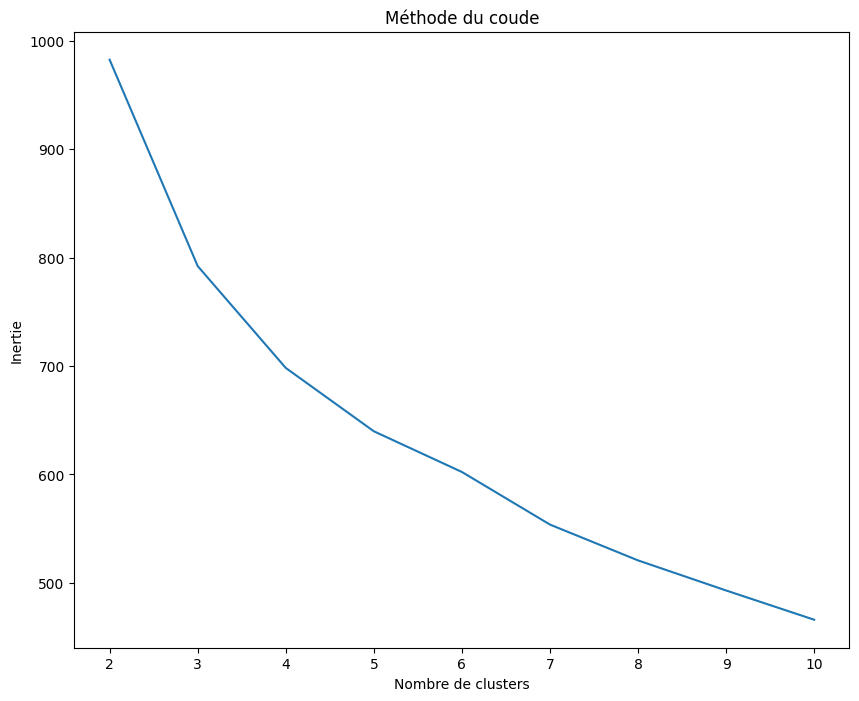

In [157]:
#Déterminer le nombre de clusters optimal avec la methode du coude et score de sillhouette
inertia = []
silhouette= []
k_list = range(2,11)

for k in k_list:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(etude_kmeans)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(etude_kmeans, kmeans.labels_))


#Visualiser les inerties pour chaque cluster à l'aide d'un graphique en courbe (methode du coude)
plt.figure(figsize=(10,8))
plt.plot(k_list, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()


Selon la méthode du coude on pourrait sélectionner entre 3 et 4 clusters, je choisi 5 clusters comme pour le CAH

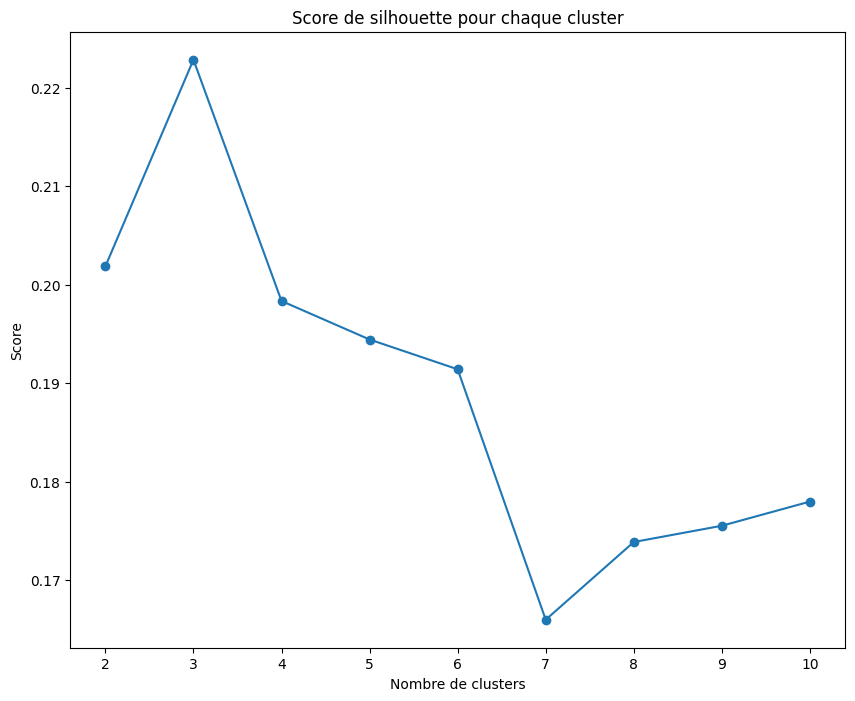

In [158]:
#Visualiser le score de silhouette pour chaque cluster
plt.figure(figsize=(10,8))
plt.plot(k_list, silhouette,marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score")
plt.title("Score de silhouette pour chaque cluster")
plt.show()

Selon le score de silhouette le nombre optimal de clusters est 3, j'effectue le kmeans sur 5 clusters comme pour le CAH

In [159]:
# Appliquer le kmeans sur le nombre de cluster choisi 5

kmeans=KMeans(n_clusters=5)
kmeans.fit(etude_kmeans)

KMeans(n_clusters=5)

In [160]:
#Stcoker les clusters dans une variable

KM_clusters = kmeans.labels_+1

#Copie du dataframe initial pour intégrer les clusters du kmeans

kmeans_etude = etude_marche.copy()

#Intégrer les clusters dans le dataframe du kmeans
kmeans_etude["KM_clusters"] = KM_clusters

kmeans_etude

Code             Pays                         Region  Importations (kg)  \
0    ZAF   Afrique du Sud               Afrique australe        515000000.0   
1    ALB          Albanie   Europe centrale et orientale         12000000.0   
2    SAU  Arabie saoudite                   Moyen-Orient        641000000.0   
3    ARM          Arménie   Europe centrale et orientale         33000000.0   
4    AUS        Australie  Australie et Nouvelle-Zélande         16000000.0   
..   ...              ...                            ...                ...   
122  ZWE         Zimbabwe               Afrique australe          4000000.0   
123  EGY           Égypte                   Moyen-Orient         46000000.0   
124  USA       États-Unis               Amérique du Nord        128000000.0   
125  ETH         Éthiopie               Afrique de l'Est                0.0   
126  SLB     Îles Salomon              Iles du Pacifique          5000000.0   

     Nourriture (kg)  Production (kg)   Population  Croissance_Pop (%)  \
0       2.156000e+09     1.762000e+09   57339635.0                2.62   
1       2.700000e+07     1.600000e+07    2877013.0               -0.19   
2       1.181000e+09     5.540000e+08   35018133.0                6.93   
3       4.500000e+07     1.200000e+07    2836557.0               -1.46   
4       1.211000e+09     1.235000e+09   24979230.0                4.87   
..               ...              ...          ...                 ...   
122     6.600000e+07     6.200000e+07   15052184.0                6.34   
123     1.709000e+09     1.451000e+09  103740765.0                6.16   
124     1.861800e+10     2.229800e+10  332140037.0                2.32   
125     7.000000e+07     7.400000e+07  111129438.0                8.45   
126     5.000000e+06     0.000000e+00     659249.0                7.60   

     PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0       1.56             1257.00                    38.21   
1       4.02               54.67                    58.49   
2       3.20              363.00                    23.11   
3       5.20              100.00                    29.72   
4       2.91              766.00                    83.49   
..       ...                 ...                      ...   
122     5.01              285.00                    20.28   
123     5.33              258.00                    11.79   
124     2.97              175.00                    58.96   
125     6.82              171.50                    10.85   
126     2.75              630.00                    58.02   

     Infra_logistique (idx) Distance (km)  KM_clusters  
0                  3.190000          8684            3  
1                  2.290000          1601            4  
2                  3.110000          4682            3  
3                  2.480000          3431            4  
4                  3.970000         16926            1  
..                      ...           ...          ...  
122                1.830000          7940            5  
123                2.820000          3209            3  
124                4.050000          6166            3  
125                1.655714          5573            5  
126                2.210000         15431            2  

[127 rows x 14 columns]

In [161]:
# Afficher le nombre de pays ainsi que les pays par cluster
for clust, nombre_pays in kmeans_etude.groupby("KM_clusters"):
    nbr_pays = nombre_pays["Pays"].nunique()
    pays = nombre_pays["Pays"].tolist()
    print(f"Pour le cluster {clust} :")
    print(f"il y a {nbr_pays} pays ")
    print(f"Les pays sont {pays} \n")

Pour le cluster 1 :
il y a 20 pays 
Les pays sont ['Australie', 'Canada', 'Chili', 'Hong Kong', 'Corée du Sud', 'Costa Rica', 'Cuba', 'El Salvador', 'Guatemala', 'Haïti', 'Honduras', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Koweït', 'Nouvelle-Zélande', 'Panama', 'Paraguay', 'République dominicaine', 'Sri Lanka'] 

Pour le cluster 2 :
il y a 20 pays 
Les pays sont ['Botswana', 'Cabo Verde', 'Cambodge', 'Chypre', 'Comores', 'Djibouti', 'Eswatini', 'Fidji', 'Gambie', 'Guinée-Bissau', 'Guyana', 'Maurice', 'Mongolie', 'Monténégro', 'Macao', 'Laos', 'République kirghize', 'Suriname', 'Turkménistan', 'Îles Salomon'] 

Pour le cluster 3 :
il y a 22 pays 
Les pays sont ['Afrique du Sud', 'Arabie saoudite', 'Brésil', 'Chine', 'Colombie', 'Fédération de Russie', 'Inde', 'Indonésie', 'Malaisie', 'Maroc', 'Mexique', 'Myanmar', 'Nigéria', 'Pakistan', 'Philippines', 'Pérou', 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte', 'États-Unis'] 

Pour le cluster 4 :
il y a 29 pays 
Les pays sont ['Alba

In [162]:
#Visualisation des clusters sur une mappemonde
fig = px.choropleth(
    kmeans_etude,
    locations="Code",
    color="KM_clusters",
    hover_name="Region",
    color_continuous_scale = px.colors.diverging.Spectral,
    projection="equirectangular")

fig.show()

In [163]:
kmeans_etude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     127 non-null    object 
 1   Pays                     127 non-null    object 
 2   Region                   127 non-null    object 
 3   Importations (kg)        127 non-null    float64
 4   Nourriture (kg)          127 non-null    float64
 5   Production (kg)          127 non-null    float64
 6   Population               127 non-null    float64
 7   Croissance_Pop (%)       127 non-null    float64
 8   PIB (%)                  127 non-null    float64
 9   Couts_export (USD)       127 non-null    float64
 10  Stabilite_politique (%)  127 non-null    float64
 11  Infra_logistique (idx)   127 non-null    float64
 12  Distance (km)            127 non-null    object 
 13  KM_clusters              127 non-null    int32  
dtypes: float64(9), int32(1), object

In [164]:
#Caracterisation des clusters par variable

# Modifier le tyde de données de la colonne Distance (km)
kmeans_etude["Distance (km)"] =kmeans_etude["Distance (km)"].astype("int") 

kclust_group = kmeans_etude.iloc[:,3:].groupby("KM_clusters",as_index=False).mean()

kclust_group


KM_clusters  Importations (kg)  Nourriture (kg)  Production (kg)  \
0            1       1.212500e+08     4.003000e+08     3.391500e+08   
1            2       1.210000e+07     2.395000e+07     1.410000e+07   
2            3       1.766364e+08     3.809364e+09     4.195773e+09   
3            4       9.320690e+07     2.229310e+08     3.241034e+08   
4            5       3.408333e+07     1.257222e+08     9.327778e+07   

     Population  Croissance_Pop (%)   PIB (%)  Couts_export (USD)  \
0  1.420477e+07            3.943500  3.081000          410.895000   
1  2.786167e+06            4.430000  4.910000          345.117500   
2  2.310760e+08            3.476818  4.150000          419.522727   
3  9.422160e+06           -0.196207  3.753103           57.432069   
4  2.869071e+07            7.800556  5.144722          474.733056   

   Stabilite_politique (%)  Infra_logistique (idx)  Distance (km)  
0                54.128500                2.857500    8863.000000  
1                54.741000                2.254381    7510.850000  
2                24.914545                2.857727    6972.818182  
3                62.768276                3.135517    1459.827586  
4                20.676389                2.207447    5578.138889

In [165]:
#Graphique en coordonnées parallèles pour visualiser les performances moyennes de chaque cluster

kcols=kclust_group.columns

fig=px.parallel_coordinates(data_frame=kclust_group,color="KM_clusters", dimensions=kcols,
                            labels={"Importations (kg)" :"Importations","Nourriture (kg)":"Nourriture",
                            "Production (kg)":"Production","Croissance_Pop (%)":"Croissance_Pop",
                            "PIB (%)":"PIB","Couts_export (USD)":"Couts_export","Stabilite_politique (%)" :"Stabilite_pol",
                            "Infra_logistique (idx)":"Infra_logistique","Distance (km)":"Distance"},
                            color_continuous_scale = px.colors.diverging.Spectral)

fig.show()

 Selon le kmeans je recommande le cluster N°4\
 Importations importantes (près de 100M), Nourriture et production assez élevé (près de 500M),\ 
 Population :20M,
 Croissance_Pop : Négative (-0.19%), PIB: bon (3.7%), couts export : les plus faibles, 
 stabilite_politique et Infra_logistique les plus élevés (plus de 60% et 3.13 en indice )

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 9 - Projection des clusters sur les principales composantes selon les deux méthodes CAH et KMeans </h2>
</div>


In [166]:
#Calculer les centroïdes des clusters de la classification hiérarchique

cah_centroids = cah_group.iloc[:,1:-1]
cah_centroids

Importations (kg)  Nourriture (kg)  Production (kg)    Population  \
0       8.796774e+07     2.098710e+08     3.041613e+08  8.873966e+06   
1       3.105263e+07     7.526316e+07     4.647368e+07  3.219081e+06   
2       2.169310e+08     2.763517e+09     2.932931e+09  1.146267e+08   
3       2.982759e+07     6.527586e+07     3.700000e+07  1.910742e+07   
4       5.263158e+05     7.005789e+08     8.257368e+08  1.323712e+08   

   Croissance_Pop (%)   PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0           -0.110645  3.857097           66.146129                62.355484   
1            3.644211  3.712105          425.111579                56.554737   
2            4.340690  3.592414          459.697931                39.233103   
3            7.751379  5.280690          480.534828                25.439310   
4            5.400526  5.144737          300.593158                21.425263   

   Infra_logistique (idx)  
0                3.109355  
1                2.292506  
2                3.009655  
3                2.170082  
4                2.386617

In [167]:
#Standardiser et normaliser les centroïdes
CAHcentroids_scaled = scaler.fit_transform(cah_centroids)

#Appliquer la pca aux centroïdes
CAHcentroids_proj = pca.transform(CAHcentroids_scaled)

#Création d'un dataframe des centroïdes
CAHcentroids_proj = pd.DataFrame(CAHcentroids_proj,
                            columns=["PC1","PC2","PC3"],
                            index=["cluster1","cluster2","cluster3","cluster4","cluster5"])

CAHcentroids_proj

PC1       PC2       PC3
cluster1  1.244677 -2.937674 -0.605163
cluster2 -1.093000 -1.149525  0.729922
cluster3  3.096716  1.496589  1.510733
cluster4 -2.529071  0.906808 -0.248843
cluster5 -0.719321  1.683802 -1.386648

In [168]:
#Calculer les centroïdes des clusters du kmeans

kmeans_centroids = kclust_group.iloc[:,1:-1]
kmeans_centroids

Importations (kg)  Nourriture (kg)  Production (kg)    Population  \
0       1.212500e+08     4.003000e+08     3.391500e+08  1.420477e+07   
1       1.210000e+07     2.395000e+07     1.410000e+07  2.786167e+06   
2       1.766364e+08     3.809364e+09     4.195773e+09  2.310760e+08   
3       9.320690e+07     2.229310e+08     3.241034e+08  9.422160e+06   
4       3.408333e+07     1.257222e+08     9.327778e+07  2.869071e+07   

   Croissance_Pop (%)   PIB (%)  Couts_export (USD)  Stabilite_politique (%)  \
0            3.943500  3.081000          410.895000                54.128500   
1            4.430000  4.910000          345.117500                54.741000   
2            3.476818  4.150000          419.522727                24.914545   
3           -0.196207  3.753103           57.432069                62.768276   
4            7.800556  5.144722          474.733056                20.676389   

   Infra_logistique (idx)  
0                2.857500  
1                2.254381  
2                2.857727  
3                3.135517  
4                2.207447

In [169]:
#Standardiser et et normaliser nos centroïdes
KMcentroids_scaled = scaler.fit_transform(kmeans_centroids)

#Appliquer la pca sur nos centroïdes
KMcentroids_proj = pca.transform(KMcentroids_scaled)

#Création d'un dataframe pour nos centroïdes

KMcentroids_proj= pd.DataFrame(KMcentroids_proj,
                               columns=["PC1","PC2","PC3"],
                               index=["cluster1","cluster2","cluster3","cluster4","cluster5"])

KMcentroids_proj



PC1       PC2       PC3
cluster1  0.223200 -0.963756  1.588294
cluster2 -1.727570 -0.446652 -1.003964
cluster3  2.797674  2.582488  0.515724
cluster4  1.288219 -2.645093 -0.732566
cluster5 -2.581523  1.473014 -0.367487

In [170]:
#Appliquer la PCA sur nos individus pour obtenir leurs coordonnées pour la projection

pca=PCA(n_components=3)
pca.fit(X_scaled)
X_proj=pca.transform(X_scaled)

#Mettre dans un dataframe les coordonnées des individus
X_proj = pd.DataFrame(X_proj, columns=["PC1","PC2","PC3"])
X_proj

PC1       PC2       PC3
0    2.515242  1.319575  2.759915
1   -0.550356 -2.024835 -0.523319
2    1.619458  1.149635  1.370677
3   -0.446221 -1.489806 -0.672086
4    2.030087  0.399987  0.800858
..        ...       ...       ...
122 -1.542067  0.892832 -0.297870
123  1.266808  2.223814 -0.469420
124  4.561311  1.525767 -0.047153
125 -2.174818  2.224257 -1.787332
126 -3.463879 -2.178845  1.664224

[127 rows x 3 columns]

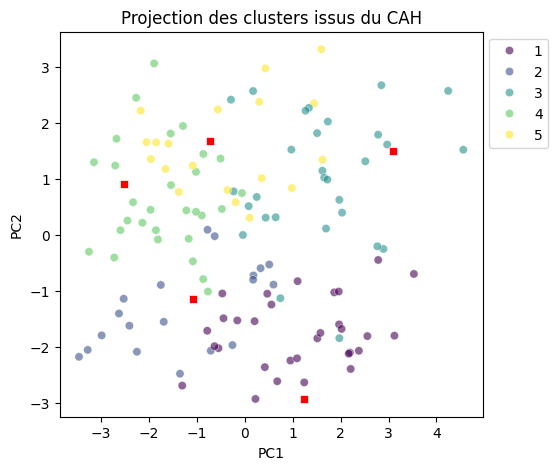

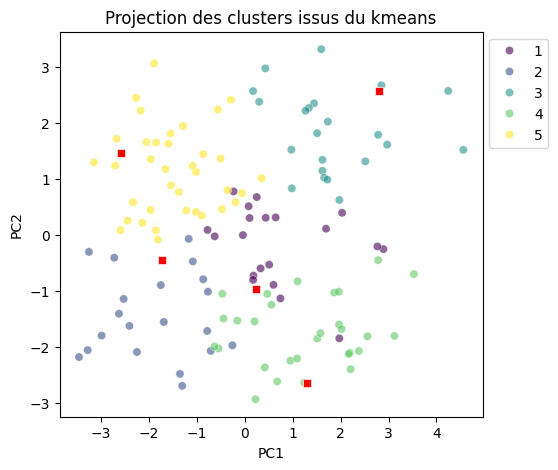

In [171]:
#Projection des clusters ainsi que leur centroïde sur les plans factoriels


#Nuage de points des clusters du CAH
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:,0],y=X_proj.iloc[:,1], hue=CAH_clusters,alpha=0.6,palette="viridis")
sns.scatterplot(data= CAHcentroids_proj,x=CAHcentroids_proj.iloc[:,0],y=CAHcentroids_proj.iloc[:,1], marker="s",c="red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Projection des clusters issus du CAH")
plt.show()



#Nuage de points des clusters du kmeans
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:,0],y=X_proj.iloc[:,1], hue=KM_clusters, alpha=0.6, palette="viridis")
sns.scatterplot(data= KMcentroids_proj, x=KMcentroids_proj.iloc[:,0], y=KMcentroids_proj.iloc[:,1], marker="s", c="red")
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("Projection des clusters issus du kmeans")
plt.show()

CAH : les clusters sont superposés, non précis\
kmeans : Les clusters sont légèrement superposé, meilleure définition

In [172]:
#Visualisation en 3 dimensions des clusters issus du CAH

fig = px.scatter_3d(X_proj, x="PC1", y="PC2", z="PC3", color =CAH_clusters, opacity=0.8)
fig.show()

In [173]:
#Visualisation en 3 dimensions des clusters issus du kmeans
fig = px.scatter_3d(X_proj, x="PC1", y="PC2", z="PC3", color =KM_clusters, opacity=0.8)
fig.show()

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 10 - Recommandations </h2>
</div>

Pour la classification hiérarchique le cluster récommandé est le N°1

In [174]:
# Création d"un dataframe pour le cluster N°1
CAH_cluster1 = cah_etude[cah_etude["CAH_clusters"]==1]

In [175]:
#Liste des pays du cluster N°1

CAH_cluster1["Pays"].unique()




array(['Albanie', 'Arménie', 'Autriche', 'Belgique', 'Bosnie-Herzégovine',
       'Bulgarie', 'Bélarus', 'Chypre', 'Croatie', 'Danemark', 'Espagne',
       'Estonie', 'Grèce', 'Géorgie', 'Hongrie', 'Irlande', 'Lettonie',
       'Lituanie', 'Macédoine du Nord', 'Moldova', 'Monténégro',
       'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie',
       'République slovaque', 'République tchèque', 'Serbie', 'Slovénie',
       'Suisse', 'Suède'], dtype=object)

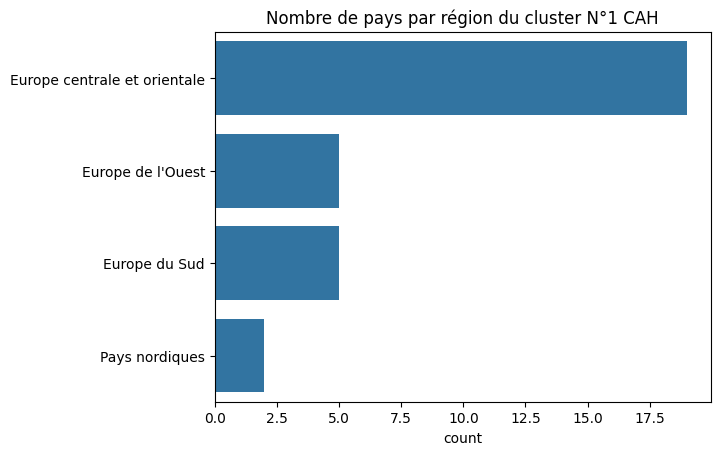

In [176]:
#Graphique pour montrer le nombre de pays par région du cluster 1
sns.countplot(CAH_cluster1, y="Region")
plt.title("Nombre de pays par région du cluster N°1 CAH")
plt.ylabel("")
plt.show()

In [177]:
#Visualisation sur une mappemonde du cluster n°1
fig = px.choropleth(
    CAH_cluster1,
    locations="Code",
    color="Region",
    hover_name="Pays",
    color_continuous_scale = px.colors.sequential.Plasma,
    projection="equirectangular")

fig.show()

Pour le kmeans le cluster récommandé est le N°4

In [178]:
# Création d"un dataframe pour le cluster N°4
KMcluster4 = kmeans_etude[kmeans_etude["KM_clusters"]==4]

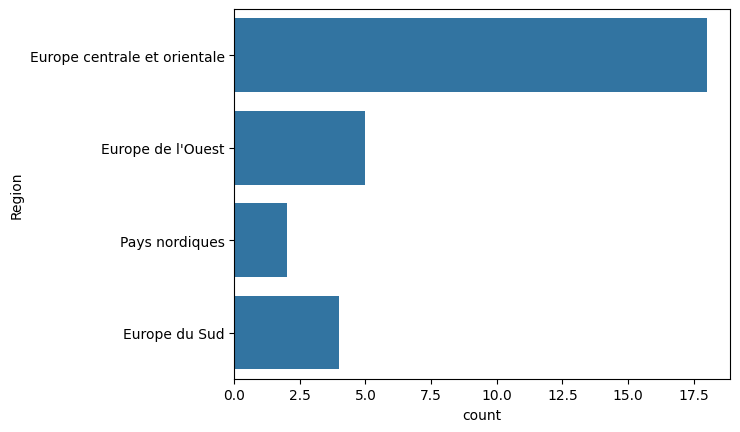

In [179]:
##Graphique pour montrer le nombre de pays par région du cluster n°4
sns.countplot(KMcluster4, y="Region")
plt.show()

In [181]:
#Liste des pays du cluster 4 Kmeans
KMcluster4["Pays"].values

array(['Albanie', 'Arménie', 'Autriche', 'Belgique', 'Bosnie-Herzégovine',
       'Bulgarie', 'Bélarus', 'Croatie', 'Danemark', 'Espagne', 'Estonie',
       'Grèce', 'Géorgie', 'Hongrie', 'Irlande', 'Lettonie', 'Lituanie',
       'Macédoine du Nord', 'Moldova', 'Pays-Bas', 'Pologne', 'Portugal',
       'Roumanie', 'République slovaque', 'République tchèque', 'Serbie',
       'Slovénie', 'Suisse', 'Suède'], dtype=object)

In [183]:
#Visualiser le cluster n°4 issu du kmeans sur une mappemonde


fig = px.choropleth(
    KMcluster4,
    color_continuous_scale = px.colors.sequential.Plasma,
    locations="Code",
    color="Region",
    hover_name="Pays",
    projection="equirectangular")

fig.show()



<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 11 - Quel est l'algorithme plus performant ? </h2>
</div>

In [184]:
#Mesurer la qualité de l'algorithme du CAH

print("Silhouette score :",silhouette_score(etude_cah, CAH_clusters))
print("Davies-Bouldin score :", davies_bouldin_score(etude_cah, CAH_clusters))

Silhouette score : 0.1810325019872298
Davies-Bouldin score : 1.6267060048584798


In [185]:
#Mesurer la qualité de l'algorthme du Kmeans
print("Silhouette score :",silhouette_score(etude_kmeans, KM_clusters))
print("Davies-Bouldin score :", davies_bouldin_score(etude_kmeans, KM_clusters))

Silhouette score : 0.19309758227492685
Davies-Bouldin score : 1.6071678698158114


L'algorithme recommandé est celui du kmeans car silhouette score est plus élevé que celui du CAH\
et l'indice de Davies-Bouldin est plus faible que celui du CAH